# Práctica 1 PREDICCIÓN DE LA PRODUCCIÓN DE ENERGÍA SOLAR

Autores: Joaquín García Pozo 100451183
         Andrés Rodríguez García 100451253

# Índice
1) Enlace del repositorio
2) Lectura del conjunto de datos
3) Análisis Exploratorio de Datos (EDA)
4) División de los datos
5) Métodos básicos
6) Dimensionalidad del problema
7) Métodos avanzados
8) Modelo final


# 1) Enlace del repositorio

Esta práctica está alojada en el siguiente repositorio:
https://github.com/100451183/Grupo8_Practica1.git

En este repositorio están registrados todos los cambios que se han ido realizando a lo largo del desarrollo de la práctica

# 2) Lectura del conjunto de datos

Se leen los datos correspondientes al número de grupo, en nuestro caso el 8

In [2]:
import pandas
disp_df = pandas.read_csv("disp_st8ns1.txt.bz2", compression="bz2", index_col=0)

# 3) Análisis exploratorio de datos

Con el objetivo de comprender los datos en términos de su distribución, estadísticas descriptivas, patrones y posibles 
relaciones entre variables se realiza un análisis exploratorio de datos (EDA). Ayuda a identificar datos atípicos o errores en los datos.
Permite seleccionar las variables más importantes del modelo.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Se muestra el contenido del dataframe
disp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

In [5]:
# Se visualiza una muestra aleatoria de los datos
print(disp_df.sample(6))

       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V2965    0.000000    0.000000    0.000000    0.000000    0.000000  229.986119   
V25      0.120000    0.010909    0.000000    0.000000    0.000000  338.960175   
V3421    2.098182    0.075455    0.268182    0.076364    0.243636  392.712660   
V666     0.000000    0.000000    0.000000    0.000000    0.000000  262.040580   
V772     0.000000    0.000000    0.000000    0.000000    0.000000  232.953928   
V4172    1.668182    0.052727    0.160000    0.501818    2.462727  367.188793   

       dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V2965  230.645265  240.062475  260.987593  258.136971  ...  234.248409   
V25    297.345123  291.566231  303.452737  305.801225  ...  265.705444   
V3421  389.146429  394.341414  390.493386  389.130363  ...  212.921194   
V666   261.849013  267.913444  282.815335  282.526994  ...  256.538207   
V772   217.244188  222.848097  240.958413  242.865538  ...  23

In [6]:
# Se visualizan los 9 primeros registros de datos
print(disp_df.head(9))

    apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1    0.000000    0.000000    0.000000    0.000000    0.000000  276.583582   
V2    0.000000    0.000000    0.011818    0.037273    0.543636  249.089505   
V3    0.014545    0.000000    0.000000    0.000000    0.002727  229.461820   
V4    0.000000    0.009091    0.000000    0.000000    0.000000  239.590321   
V5    0.000000    0.000000    0.000000    0.000000    0.000000  230.253657   
V6    0.000000    0.000000    0.000000    0.003636    0.022727  262.650191   
V7    0.000000    0.000000    0.000000    0.000000    0.000000  241.442841   
V8    0.000000    0.000000    0.000000    0.000000    0.000000  208.358092   
V9    0.000000    0.000000    0.000000    0.000000    0.001818  224.955149   

    dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V1  246.514368  251.629031  264.832217  262.468350  ...  249.504475   
V2  282.460488  297.254822  315.532651  310.292719  ...  200.094627   
V3  21

Se imprimen varias muestras de los datos para observar la magnitud de estos. Observamos también la relación de los atributos
de entrada con la salida. 

In [7]:
# Número de filas y columnas del conjunto de datos
print(disp_df.shape)

# Tipos de las variables
print(disp_df.dtypes)

(4380, 76)
apcp_sf1_1    float64
apcp_sf2_1    float64
apcp_sf3_1    float64
apcp_sf4_1    float64
apcp_sf5_1    float64
               ...   
uswrf_s2_1    float64
uswrf_s3_1    float64
uswrf_s4_1    float64
uswrf_s5_1    float64
salida          int64
Length: 76, dtype: object


In [8]:
# Observar valores nulos. En esta primera sentencia se observan en una tabla
# valores booleanos que especifican si ese campo es nulo.
print(disp_df.isnull())

# Se contabilizan los valores nulos.
print(disp_df.isnull().sum())

       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1          False       False       False       False       False       False   
V2          False       False       False       False       False       False   
V3          False       False       False       False       False       False   
V4          False       False       False       False       False       False   
V5          False       False       False       False       False       False   
...           ...         ...         ...         ...         ...         ...   
V4376       False       False       False       False       False       False   
V4377       False       False       False       False       False       False   
V4378       False       False       False       False       False       False   
V4379       False       False       False       False       False       False   
V4380       False       False       False       False       False       False   

       dlwrf_s2_1  dlwrf_s3

No hay valores nulos en el conjunto de datos. En el caso en el que hubieran habría que imputarlos o eliminarlos. Hay que tener en cuenta
que debido a la existencia de múltiples valores nulos, su eliminación podría llevar a la pérdida de información importante y afectar negativamente al análisis o modelo

In [9]:
print(disp_df.value_counts())

apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  dswrf_s1_1  dswrf_s2_1  dswrf_s3_1  dswrf_s4_1  dswrf_s5_1  pres_ms1_1     pres_ms2_1     pres_ms3_1     pres_ms4_1     pres_ms5_1     pwat_ea1_1  pwat_ea2_1  pwat_ea3_1  pwat_ea4_1  pwat_ea5_1  spfh_2m1_1  spfh_2m2_1  spfh_2m3_1  spfh_2m4_1  spfh_2m5_1  tcdc_ea1_1  tcdc_ea2_1  tcdc_ea3_1  tcdc_ea4_1  tcdc_ea5_1  tcolc_e1_1  tcolc_e2_1  tcolc_e3_1  tcolc_e4_1  tcolc_e5_1  tmax_2m1_1  tmax_2m2_1  tmax_2m3_1  tmax_2m4_1  tmax_2m5_1  tmin_2m1_1  tmin_2m2_1  tmin_2m3_1  tmin_2m4_1  tmin_2m5_1  tmp_2m_1_1  tmp_2m_2_1  tmp_2m_3_1  tmp_2m_4_1  tmp_2m_5_1  tmp_sfc1_1  tmp_sfc2_1  tmp_sfc3_1  tmp_sfc4_1  tmp_sfc5_1  ulwrf_s1_1  ulwrf_s2_1  ulwrf_s3_1  ulwrf_s4_1  ulwrf_s5_1  ulwrf_t1_1  ulwrf_t2_1  ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  uswrf_s3_1  uswrf_s4_1  uswrf_s5_1  salida  
0.000000    0.000000    0.000000    0.000000    0.000000    154.335406  152.

El siguiente comando proporciona una descripción estadística de los datos en términos de su tendencia central, dispersión y forma de distribución. También muestra información útil para comprender la distribución de los datos.

In [10]:
disp_df.describe()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,...,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.708567,0.293943,0.525002,0.260699,0.530149,314.901998,315.658584,323.094642,342.390701,341.641629,...,244.779701,248.995312,258.995144,258.164788,0.138979,40.085803,77.038377,125.458012,97.172893,1.594500e+07
std,2.599816,1.211324,1.900262,1.000023,1.975711,56.241545,58.376389,59.334196,61.733754,61.695498,...,37.662362,37.157497,39.951473,39.538514,0.337704,27.012235,32.117291,43.376068,36.612104,8.112528e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,154.335406,152.760176,157.433634,175.691114,173.524779,...,115.091405,118.820144,109.060597,116.585080,0.000000,0.090909,2.909091,4.818182,2.727273,7.470000e+04
25%,0.000000,0.000000,0.000000,0.000000,0.000000,268.206411,267.874264,274.796959,292.816105,291.259751,...,227.355142,231.339967,240.989062,239.332283,0.000000,14.727273,52.613636,104.909091,71.000000,9.667200e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.405290,319.207540,326.240827,345.789484,344.639153,...,250.098898,254.305866,267.363606,265.883269,0.000000,37.000000,80.318182,134.545455,102.727273,1.565535e+07
75%,0.138409,0.047500,0.140909,0.038182,0.092955,364.984977,368.697012,376.999899,398.002730,396.524137,...,273.489209,277.242391,288.239120,287.865822,0.000000,63.750000,104.090909,154.181818,127.818182,2.299088e+07
max,51.623637,22.934545,32.982727,15.975455,39.899091,422.276065,427.649256,430.104545,460.657246,461.183133,...,311.586634,313.781505,324.802854,325.166243,1.000000,102.000000,283.818182,483.090909,294.818182,3.170220e+07


# 4) Datos

Los datos se componen de 15 variables meteoriológicas por 5 instantes de tiempo más la variable de salida. Se trabajan con datos de 12 años. 8 años se utilizan para entrenar el modelo, 2 años para el conjunto de validación y 2 años para el conjunto de prueba.

In [11]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.preprocessing import MinMaxScaler

In [139]:
# Se normalizan los datos,lo que puede mejorar la precisión del modelo
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(disp_df)
df_normalized = pd.DataFrame(normalized_data, columns=disp_df.columns)

# Separar datos de entrenamoiento y test, 10 y 2 años respectivamente
X_train, X_test, y_train, y_test = train_test_split(df_normalized.iloc[:, :-1], df_normalized.iloc[:, -1],
                                                    train_size=3650, shuffle=False)

X = df_normalized.select_dtypes(include=np.number).columns.tolist()
y = ["salida"]

"""# Crear conjunto de entrenamiento
X_train = df_normalized.iloc[:2920, :-1]
y_train = df_normalized.iloc[:2920, -1]

# Crear conjunto de validación
X_val = df_normalized.iloc[2920:4380, :-1]
y_val = df_normalized.iloc[2920:4380, -1]

# Crear conjunto de prueba
X_test = df_normalized.iloc[4380:, :-1]
y_test = df_normalized.iloc[4380:, -1]
"""

# Los indices que tienen valor -1 se mantienen en entrenamiento
train_indices = np.full((2920,), -1, dtype=int)

# Los indices con valor mayor o igual que 0 se mantienen en validación
val_indices = np.full((730,), 0, dtype=int)
test_fold = np.append(train_indices, val_indices)

# Se usan indices predefinidos en lugar de hacer una división aleatoria
ps = PredefinedSplit(test_fold)



## 5) Métodos básicos

Las métricas a evaluar en todos los métodos son el error absoluto medio (MAE), medida de distancia entre las predicciones y los valores reales, y la raíz cuadrada del error cuadrático medio (RSME), que mide la raíz cuadrada media de los errores entre los valores predichos y los valores reales. Se ha decido también añadir el estudio de la métrica de r2_score, que se basa en la comparación entre la varianza de los valores predichos por el modelo y la varianza de los valores reales del conjunto de datos.

## KNN

K-Nearest Neighbors (K-NN) es un algoritmo de aprendizaje automático. En esta caso, regresión, la predicción se basa en la media de los valores objetivo de las K instancias más cercanas.  

In [13]:
# KNN con hiperparámetros por omisión

# Crear el objeto KNeighborsRegressor
knn = KNeighborsRegressor()

# Fijar la semilla para que el método sea reproducible
np.random.seed(53)

# Entrenar el modelo con los datos de entrenamiento y medir el tiempo
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()

# Realizar predicciones sobre los datos de prueba
y_pred = knn.predict(X_test)

# Calcular las métricas de evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.7531127290996391
Error cuadrático medio (MSE): 0.014280138590811191
Raíz cuadrada del error cuadrático medio (RMSE): 0.11949953385185731
Mean Absolute Error (MAE): 0.07896182977576086
Tiempo de entrenamiento: 0.005489826202392578


## KNN evaluado con MAE

Se evalua el modelo según MAE. Los hiperparámetros a ajustar son:
- n_neighbors: el número de vecinos más cercanos para predecir el valor de salida.
- weights: la forma en que se ponderarán los vecinos más cercanos en la predicción. "uniforme", todos los vecinos tienen el mismo peso o "distancia", los vecinos más cercanos tienen más peso que los más lejanos.
- metric: la medida de distancia que se utilizará para calcular la distancia entre los ejemplos. Las distancias son Manhattan, Euclidiana y Minkowski.
- algorithm: El algoritmo que se utilizará para buscar los vecinos más cercanos. Puede ser "ball_tree" (árbol de bolas), "kd_tree" (árbol k-dimensional), "brute" (fuerza bruta) o "auto" (selecciona automáticamente el mejor algoritmo según los datos de entrada).

Mediante la búsqueda gridsearch se extraen los hiperparámetros que mejor se ajustan. Se selecciona un scoring en mae para que se pueda mejorar esa métrica.

In [14]:
param_grid = {'n_neighbors': np.arange(1, 45),
              'weights': ['uniform', 'distance'],
              'metric': ['manhattan', 'euclidean', 'minkowski'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}


knn = KNeighborsRegressor()
np.random.seed(53)

grid_search = GridSearchCV(knn, 
                   param_grid,
                   scoring="neg_mean_absolute_error",
                   cv=ps,
                   n_jobs = -1,
                   verbose = 1)


start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 1056 candidates, totalling 1056 fits
Mejores hiperparámetros: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Mejor puntuación de validación cruzada: 0.07358321881246135
Coeficiente de determinación del modelo: 0.7703187754760225
Error cuadrático medio (MSE): 0.013284928404564526
Raíz cuadrada del error cuadrático medio (RMSE): 0.11526026377101749
Mean Absolute Error (MAE): 0.07551555690923561
Tiempo de entrenamiento: 29.24991011619568


Se observa que los resultados mejoran respecto al método knn sin hiperparámetros ajustados. Las medidas de rmse y mae son inferiores y el resultado de r2_score ha mejorado, indicando que se ha producido una mejora en la predicción del modelo. El tiempo de entrenamiento es superior debido al que hay que realizar búsqueda gridsearch, lo que lo incremente. A esto se suma la cantidad de hiperparámetros a probar. El número de vecinos es acorde al tamaño del problema, ya que menos podría llevar al sobreajuste y formar un modelo complejo. Por el contrario, si es un número muy grande el modelo será demasiado simple y de bajo ajuste.

## KNN evaluado con RMSE

Se evalua con RMSE. Los hiperparámetros a ajustar son los mismos que en el ajuste anterior, al igual que las métricas.

In [15]:
param_grid = {'n_neighbors': np.arange(1, 45),
                'weights': ['uniform', 'distance'],
                'metric': ['manhattan', 'euclidean', 'minkowski'],
                'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}


knn = KNeighborsRegressor()
np.random.seed(53)

grid_search = GridSearchCV(knn, 
                   param_grid,
                   scoring="neg_root_mean_squared_error",
                   cv=ps,
                   n_jobs = 1,
                   verbose = 1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 1056 candidates, totalling 1056 fits
Mejores hiperparámetros: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Mejor puntuación de validación cruzada: 0.10253318544475379
Coeficiente de determinación del modelo: 0.7694706415628323
Error cuadrático medio (MSE): 0.013333985084480643
Raíz cuadrada del error cuadrático medio (RMSE): 0.11547287596869077
Mean Absolute Error (MAE): 0.07577196300579321
Tiempo de entrenamiento: 115.17703294754028


Las métricas de error muestran resultados inferiores a knn sin ajustar. El coeficiente de determinación del modelo es inferior que el de la evaluación MAE, y superior al knn sin ajustar. El tiempo de entrenamiento es superior al de los demás métodos. El número de vecinos ha aumentado respecto al anterior, no de manera significativa como para que se considere sobreajustado.

## Árbol de regresión

Un árbol de regresión es un modelo de aprendizaje automático que se utiliza para predecir valores numéricos. Divide los datos en subconjuntos más pequeños, de tal manera que cada subconjunto se ajuste a una línea recta o a una función polinómica. El proceso de construcción del árbol se basa en la identificación de las características más importantes para la predicción de la variable objetivo y en la división de los datos en subconjuntos que maximizan la reducción del error de la predicción.

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import tree
import numpy as np
import time

In [17]:
# Árbol de regresión con hiperparametros por omision

# Crear el objeto KNeighborsRegressor
regressor = DecisionTreeRegressor()

# Fijar la semilla para que el método sea reproducible
np.random.seed(53)

# Entrenar el modelo con los datos de entrenamiento y medir el tiempo
start_time = time.time()
regressor.fit(X_train, y_train)
end_time = time.time()

# Realizar predicciones sobre los datos de prueba
y_pred = regressor.predict(X_test)

# Calcular las métricas de evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time
r2 = r2_score(y_test, y_pred)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.6282810075387413
Error cuadrático medio (MSE): 0.021500495792372242
Raíz cuadrada del error cuadrático medio (RMSE): 0.14663047361436246
Mean Absolute Error (MAE): 0.10441666496665486
Tiempo de entrenamiento: 0.3080921173095703


Este método tiene un coeficiente de determinación bajo, lo que demuestra que no se está ajustando bien. Los errores MAE y RMSE son incialmente altos. El tiempo de entrenamiento resulta ser inferior a los anteriores

# Arbol de regresión evaluado con MAE

Primero se evalua con MAE. Los hiperparámetros a ajustar son los siguientes:
- max_depth: la profundidad máxima del árbol.
- min_samples_split: el número mínimo de muestras requerido para dividir un nodo interno.
- min_samples_leaf: el número mínimo de muestras requerido en cada hoja del árbol.

Se realiza gridsearch para la búsqueda de hiperparámetros

In [18]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 9, 13],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_mean_absolute_error",
                        n_jobs = -1,
                        verbose = 1 )

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 175 candidates, totalling 175 fits
Mejores hiperparámetros: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}
Mejor puntuación de validación cruzada: 0.08046190274096991
Coeficiente de determinación del modelo: 0.7615777119041722
Error cuadrático medio (MSE): 0.013790517853473332
Raíz cuadrada del error cuadrático medio (RMSE): 0.1174330356138056
Mean Absolute Error (MAE): 0.08017556058769537
Tiempo de entrenamiento: 6.141889810562134


Todas las métricas han mejorado bastante, debido principalmente a que se han ajustado los mejores hiperparámetros. El coeficiente de determinación supera al arbol de regresión sin ajustar. El tiempo de entrenamiento ha aumentado debido a la búsqueda de hiperparámetros realizada.

# Arbol de regresión evaluado con RMSE

Se evalua con RMSE. Los hiperparámetros a ajustar son los mismos que en el ajuste anterior, al igual que las métricas.

In [19]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 9, 13],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_root_mean_squared_error",
                        n_jobs = -1,
                        verbose = 1 )

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 175 candidates, totalling 175 fits
Mejores hiperparámetros: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5}
Mejor puntuación de validación cruzada: 0.11250028915516366
Coeficiente de determinación del modelo: 0.7575498513558881
Error cuadrático medio (MSE): 0.01402349222531598
Raíz cuadrada del error cuadrático medio (RMSE): 0.11842082682246388
Mean Absolute Error (MAE): 0.08072203160265878
Tiempo de entrenamiento: 6.302094221115112


Las medidas están empeorando en comparación con la evaluación en MAE. Esto se debe principalmente a la sensibilidad a que RMSE es más sensible a valores extremos. Dado que hay valores extremos, no se está ajustando muy bien el modelo, o al menos mejor que MAE

## Regresión lineal

In [20]:
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import time

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

def pintaResultados(reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test.size)
  pred = reg.predict(X=X_test)
  plt.plot(x, pred[:n], 'g^', x, y_test[:n], 'b.')

Coeficiente de determinación del modelo: 0.801731443752125
Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.03300356864929199


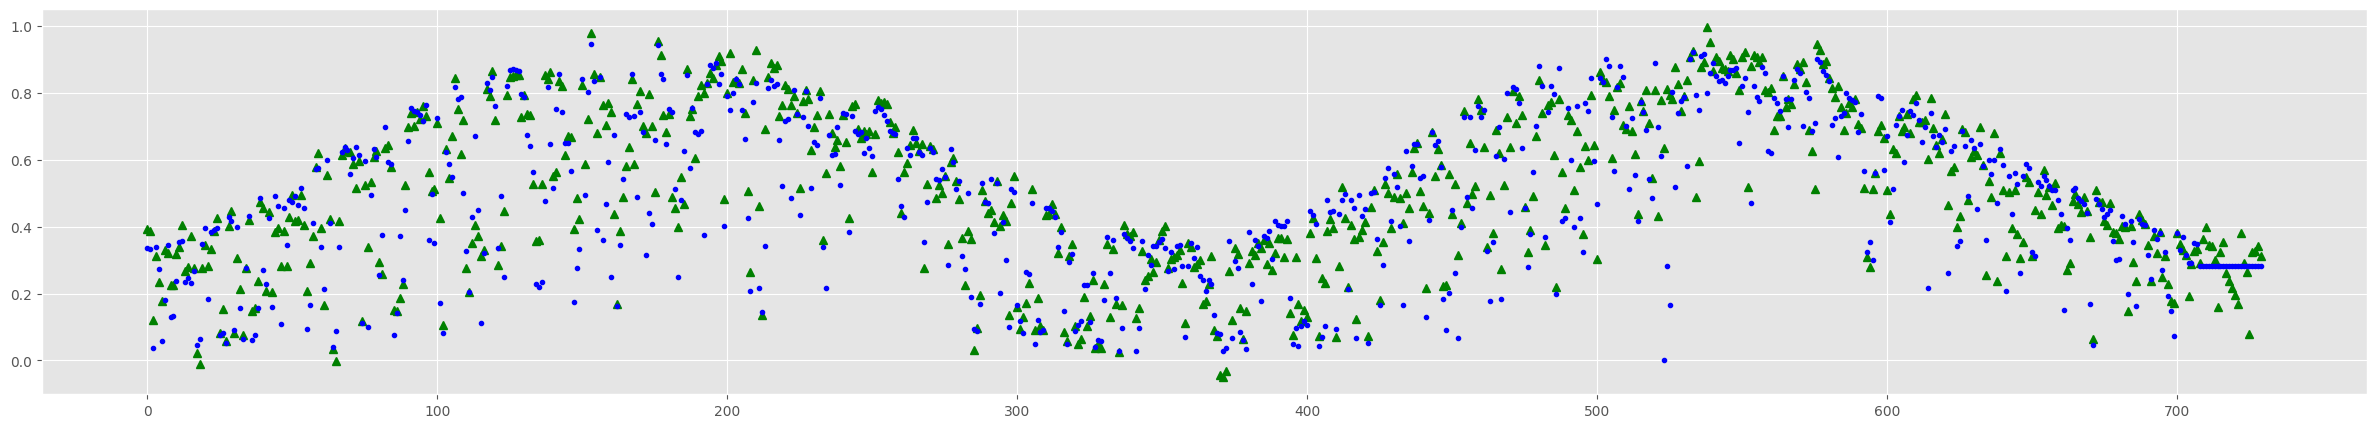

In [21]:
reg_lin = LinearRegression()

np.random.seed(53)
start_time = time.time()
reg_lin.fit(X_train, y_train)
end_time = time.time()

y_pred = reg_lin.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(reg_lin, 730)


# Regresión lineal evaluada con MAE

Fitting 1 folds for each of 2 candidates, totalling 2 fits
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Mejores hiperparámetros: {'fit_intercept': True}
Mejor puntuación de validación cruzada: 0.06833621104178994
Coeficiente de determinación del modelo: 0.801731443752125
Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.1763770580291748


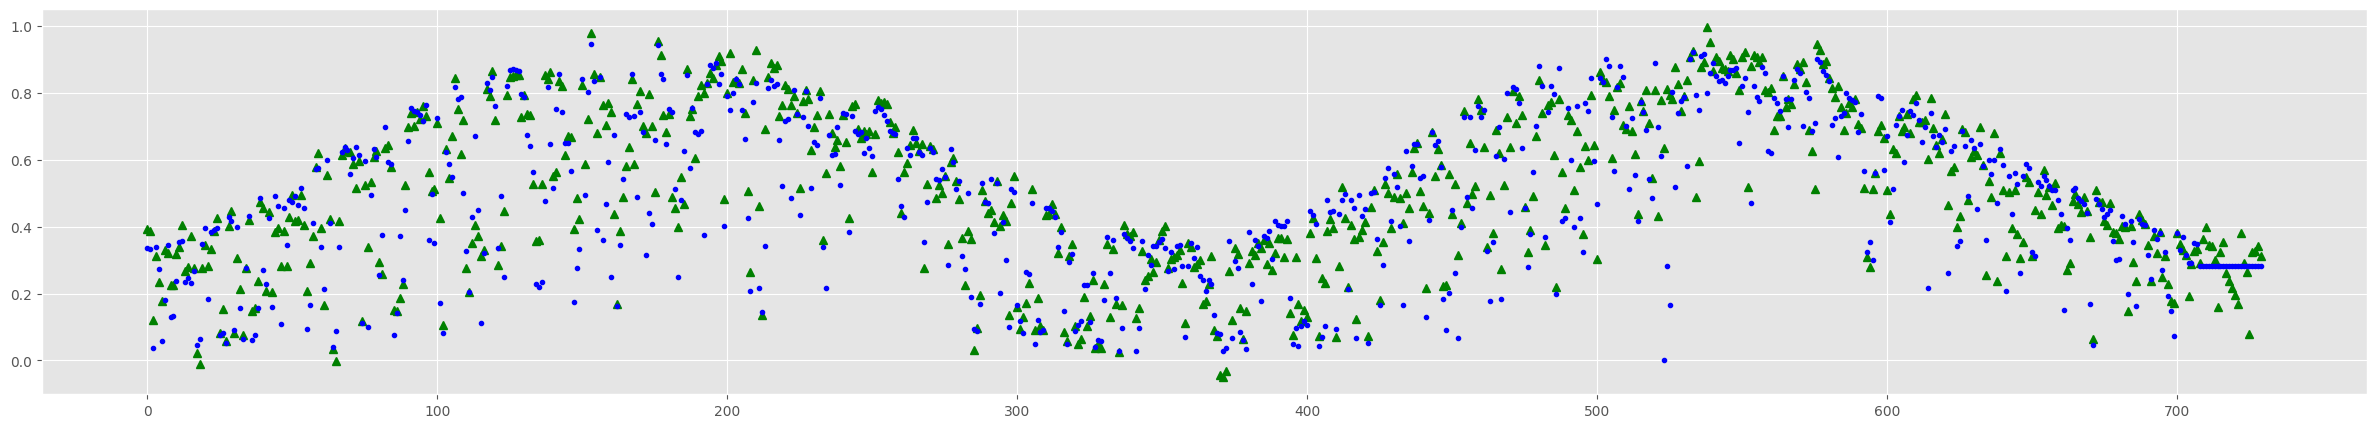

In [22]:
reg_lin = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(reg_lin, 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_mean_absolute_error",
                        n_jobs = -1,
                        verbose = 1 )

# Ajustar el objeto GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid_search, 730)

## Regresión lineal evaluada con RMSE

Fitting 1 folds for each of 2 candidates, totalling 2 fits
Fitting 1 folds for each of 2 candidates, totalling 2 fits
Mejores hiperparámetros: {'fit_intercept': True}
Mejor puntuación de validación cruzada: 0.09471688711442858
Coeficiente de determinación del modelo: 0.801731443752125
Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.20429277420043945


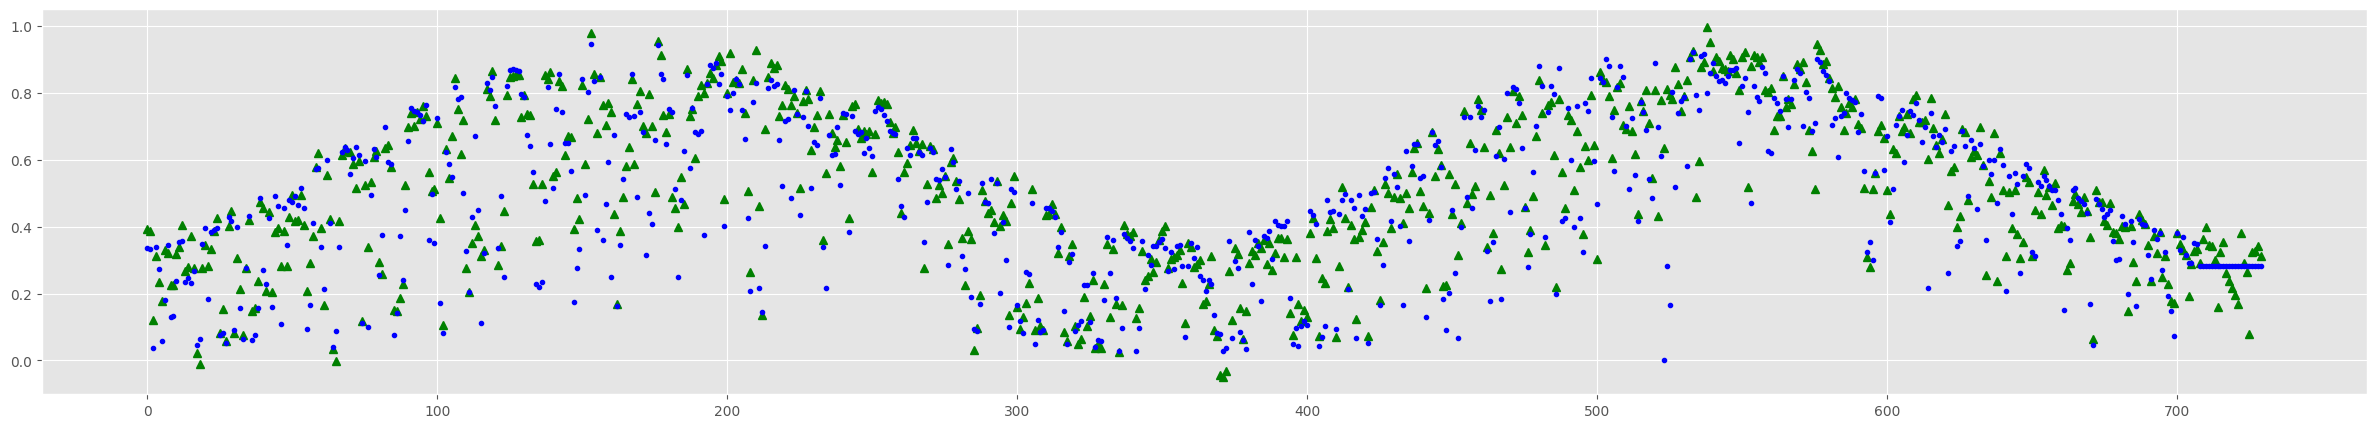

In [23]:
reg_lin = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(reg_lin, 
                        param_grid, 
                        cv=ps, 
                        scoring="neg_root_mean_squared_error",
                        n_jobs = -1,
                        verbose = 1 )

# Ajustar el objeto GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params = grid_search.best_params_

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor puntuación de validación cruzada:', -grid_search.best_score_)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid_search, 730)

# Minimos cuadrados

Coeficiente de determinación del modelo: 0.801731443752125
Error cuadrático medio (MSE): 0.011467996916545606
Raíz cuadrada del error cuadrático medio (RMSE): 0.10708873384509505
Mean Absolute Error (MAE): 0.07057602139015659
Tiempo de entrenamiento: 0.20429277420043945


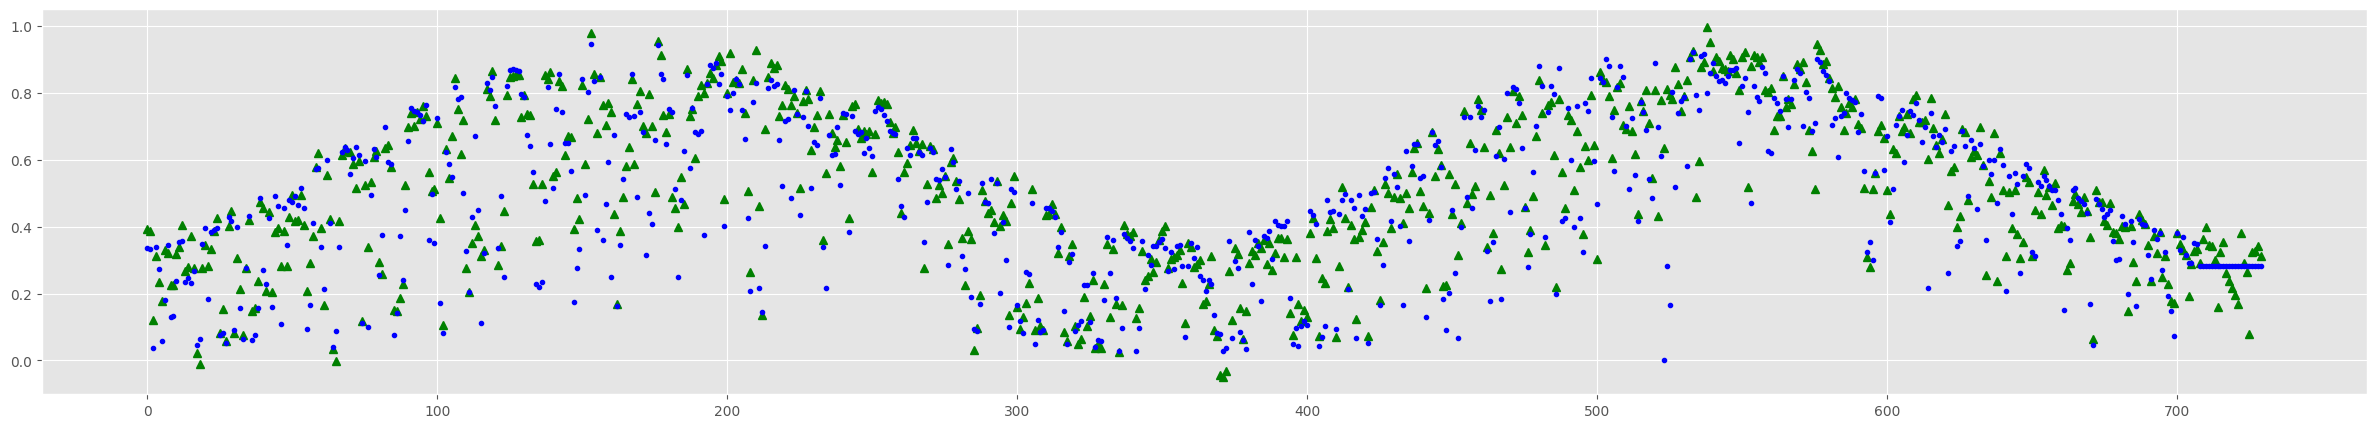

In [24]:
scaler = StandardScaler()
reg_lin = LinearRegression()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('REGL', reg_lin)])

np.random.seed(53)

start_time = time.time()
pipe_regr.fit(X_train, y_train)
end_time = time.time()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(pipe_regr,730)

# Ridge

Coeficiente de determinación del modelo: 0.8016020948206146
Error cuadrático medio (MSE): 0.011475478552442854
Raíz cuadrada del error cuadrático medio (RMSE): 0.10712366009637111
Mean Absolute Error (MAE): 0.07034805011243983
Tiempo de entrenamiento: 0.20429277420043945


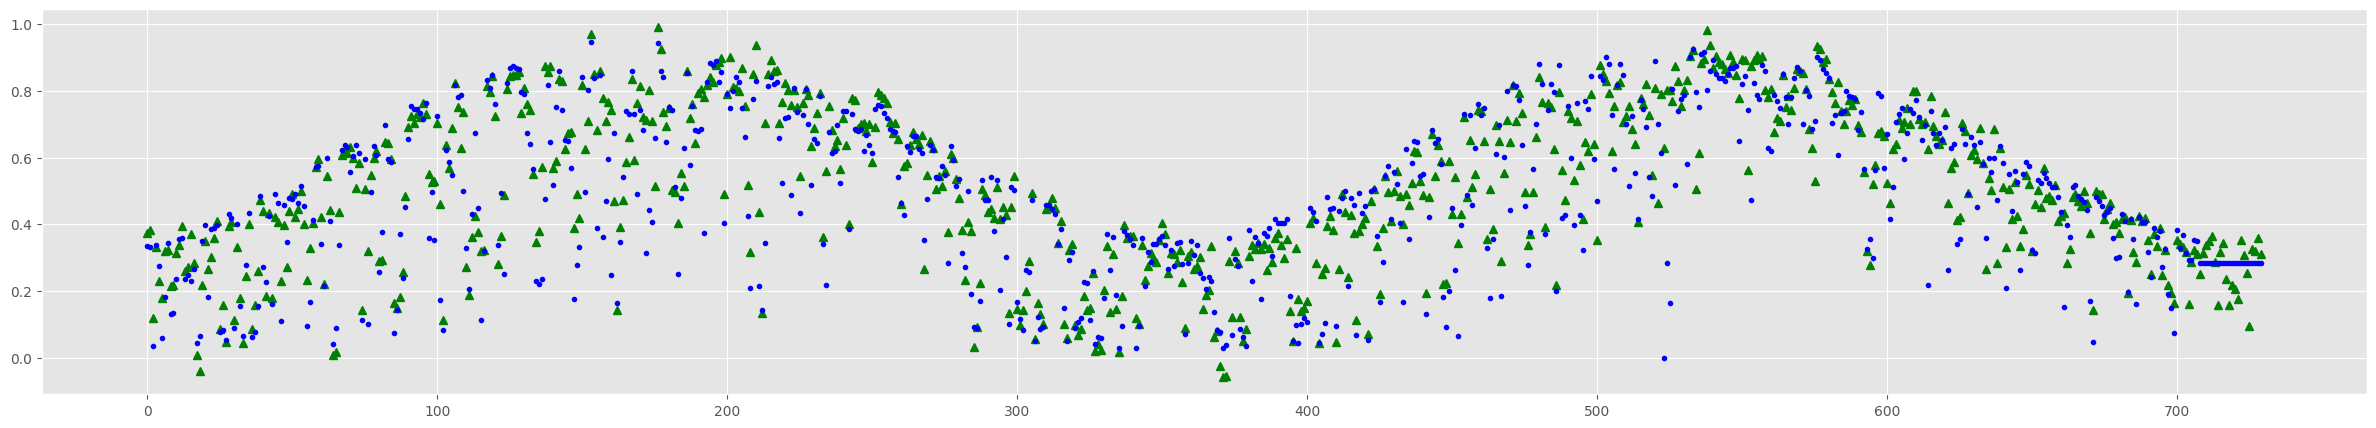

In [25]:
regrRidge = Ridge()

start_time = time.time()
regrRidge.fit(X_train, y_train)
end_time = time.time()

y_pred = regrRidge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(regrRidge, 730)


Coeficiente de determinación del modelo: 0.8022645991983623
Error cuadrático medio (MSE): 0.011437158819324358
Raíz cuadrada del error cuadrático medio (RMSE): 0.10694465306561314
Mean Absolute Error (MAE): 0.07051616410009093
Tiempo de entrenamiento: 0.20429277420043945
Mejor alpha encontrado: 0.001135733358343105


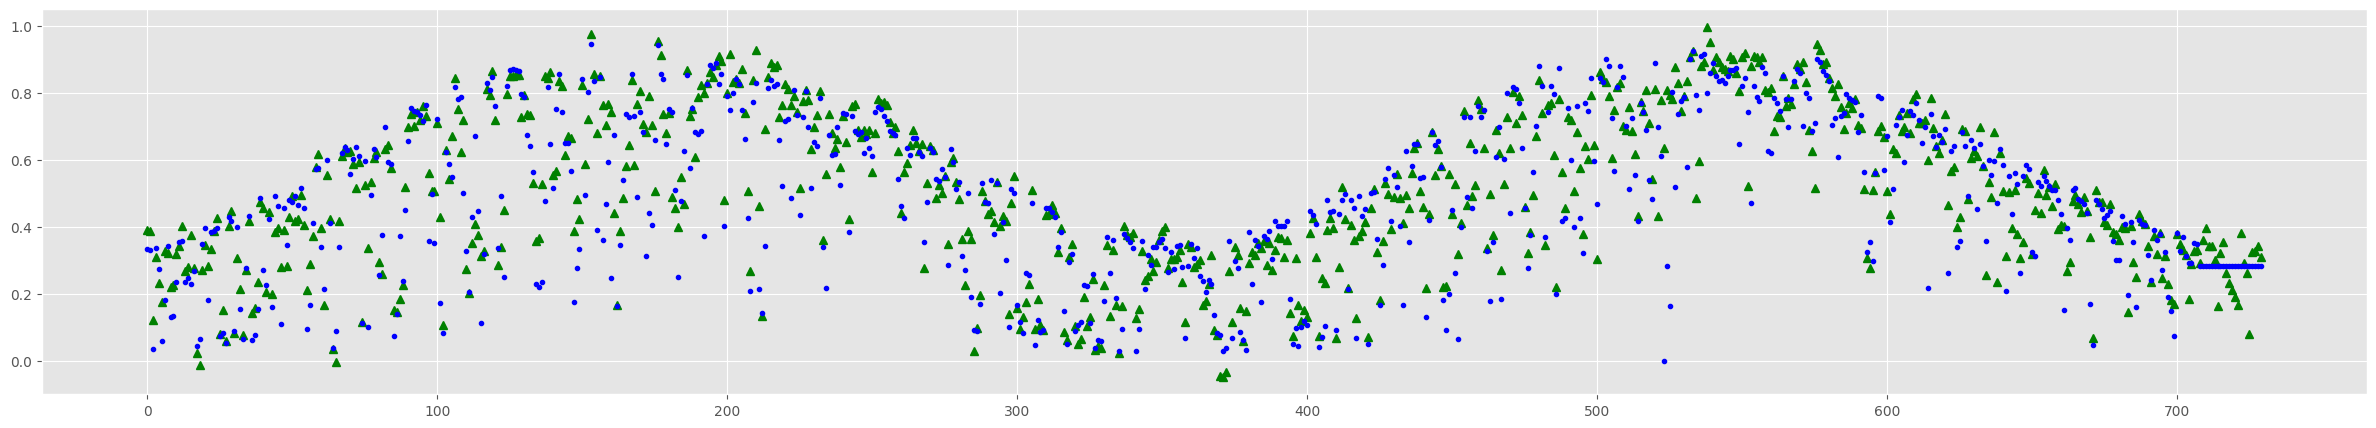

In [26]:
regrRidge = RidgeCV(
            alphas = np.logspace(-3, 8, 200),
            cv = ps
         )

start_time = time.time()
regrRidge.fit(X_train, y_train)
end_time = time.time()

y_pred = regrRidge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
best_alpha = regrRidge.alpha_

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrRidge, 730)

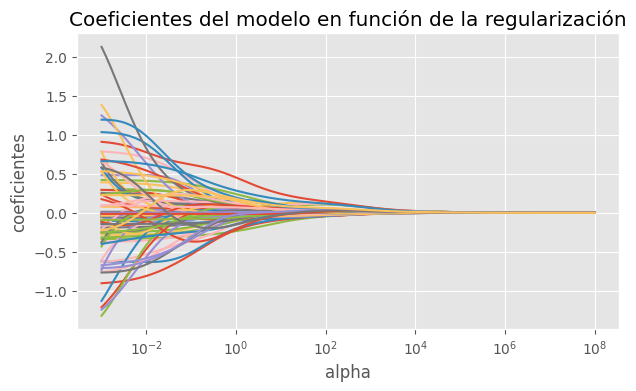

In [27]:
alphas = regrRidge.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

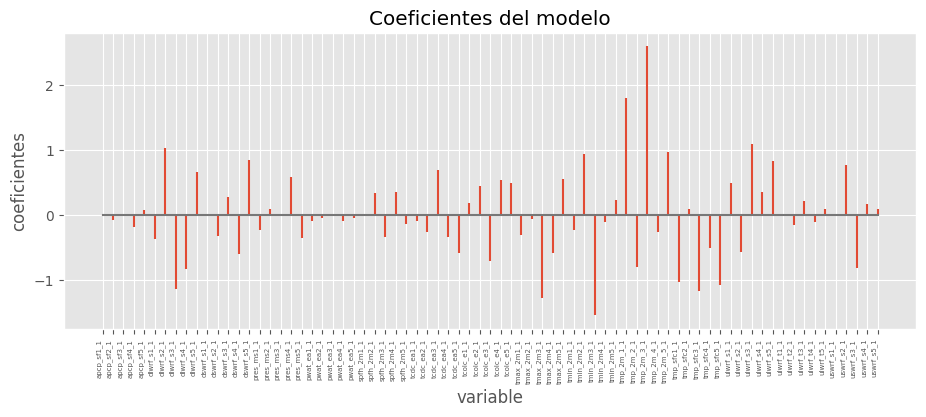

In [28]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': df_normalized.columns[:-1],
                         'coef': regrRidge.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

# Lasso

Coeficiente de determinación del modelo: -0.006035870895336082
Error cuadrático medio (MSE): 0.05818984353191226
Raíz cuadrada del error cuadrático medio (RMSE): 0.241225710760508
Mean Absolute Error (MAE): 0.2064118470056304
Tiempo de entrenamiento: 0.20429277420043945


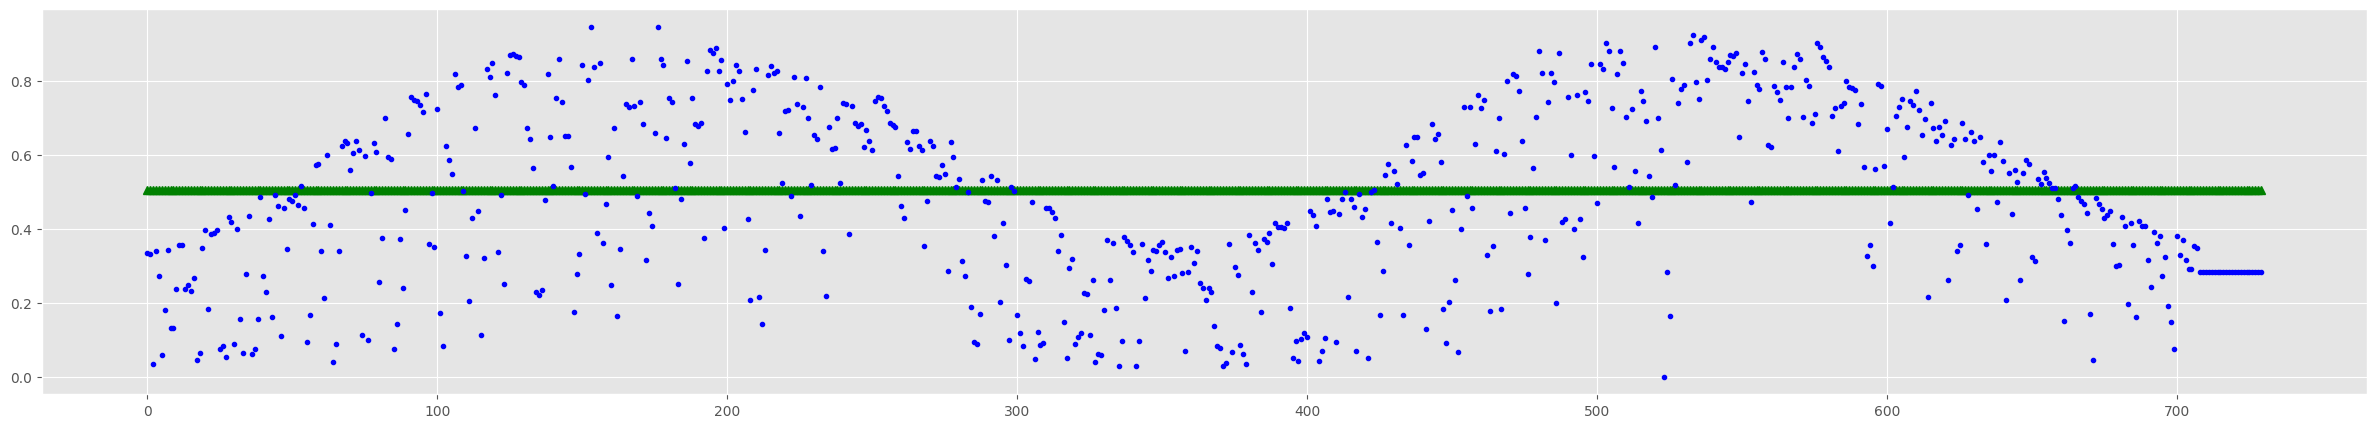

In [29]:
regrLasso = Lasso()

start_time = time.time()
regrLasso.fit(X_train, y_train)
end_time = time.time()

y_pred = regrLasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(regrLasso, 730)


Coeficiente de determinación del modelo: 0.8028294002342776
Error cuadrático medio (MSE): 0.01140449031827248
Raíz cuadrada del error cuadrático medio (RMSE): 0.10679180829198688
Mean Absolute Error (MAE): 0.07074435790450453
Tiempo de entrenamiento: 0.20429277420043945
Mejor alpha encontrado: 4.2475715525368944e-08


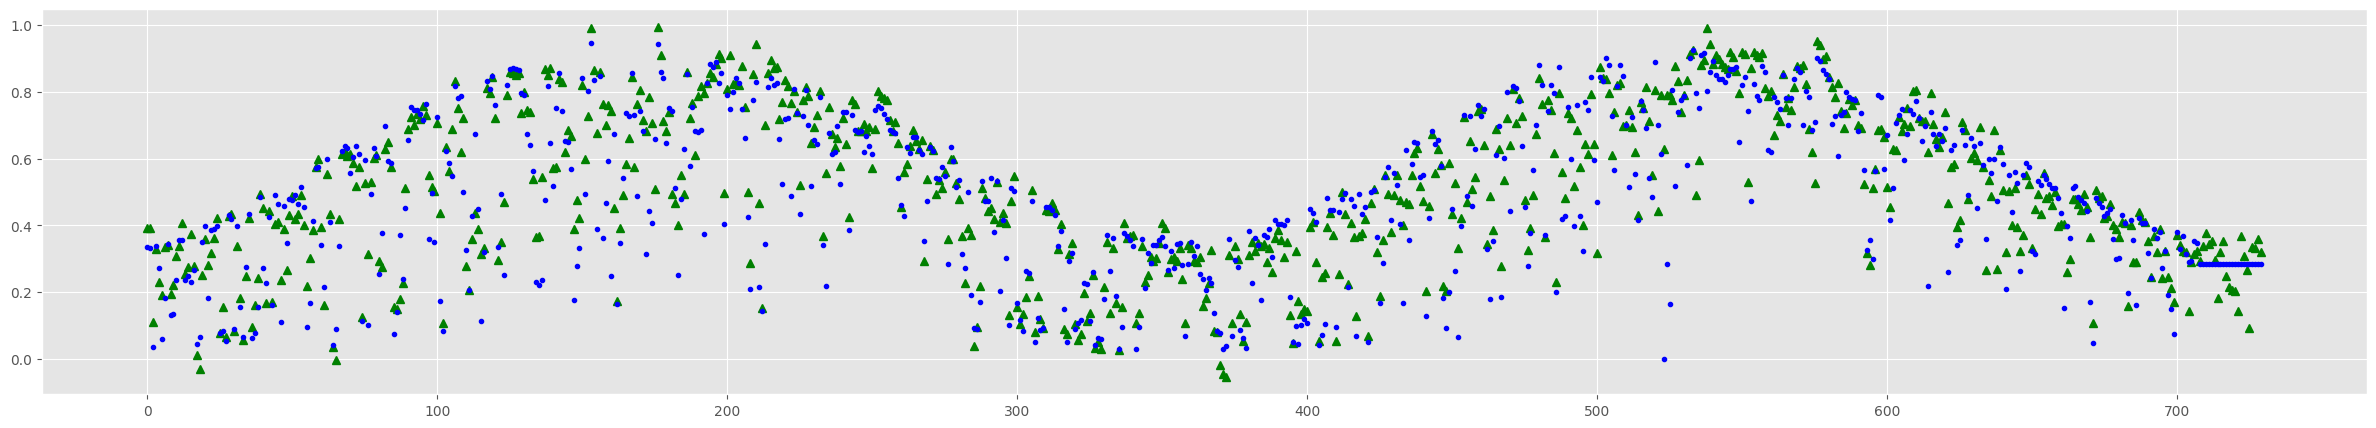

In [30]:
regrLasso = LassoCV(
            alphas          = np.logspace(-9, 3, 200),
            cv              = ps
         )

start_time = time.time()
regrLasso.fit(X_train, y_train)
end_time = time.time()

y_pred = regrLasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
best_alpha = regrLasso.alpha_
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrLasso, 730)

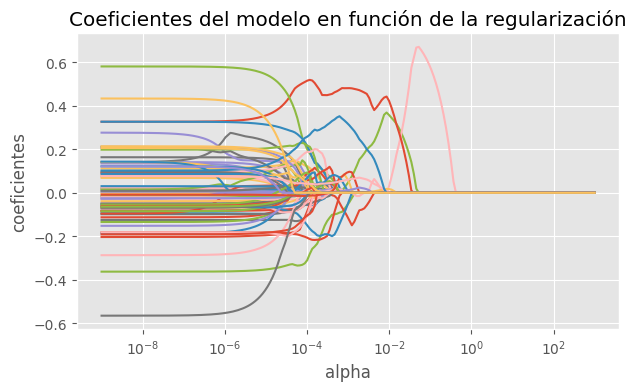

In [31]:
alphas = regrLasso.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

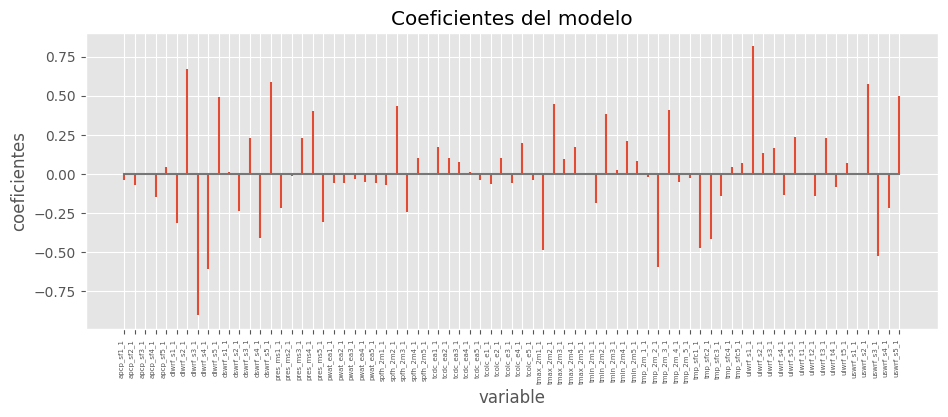

In [32]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': df_normalized.columns[:-1],
                         'coef': regrLasso.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

# ElasticNet

Coeficiente de determinación del modelo: -0.006035870895336082
Error cuadrático medio (MSE): 0.05818984353191226
Raíz cuadrada del error cuadrático medio (RMSE): 0.241225710760508
Mean Absolute Error (MAE): 0.2064118470056304
Tiempo de entrenamiento: 0.20429277420043945
Mejor alpha encontrado: 4.2475715525368944e-08


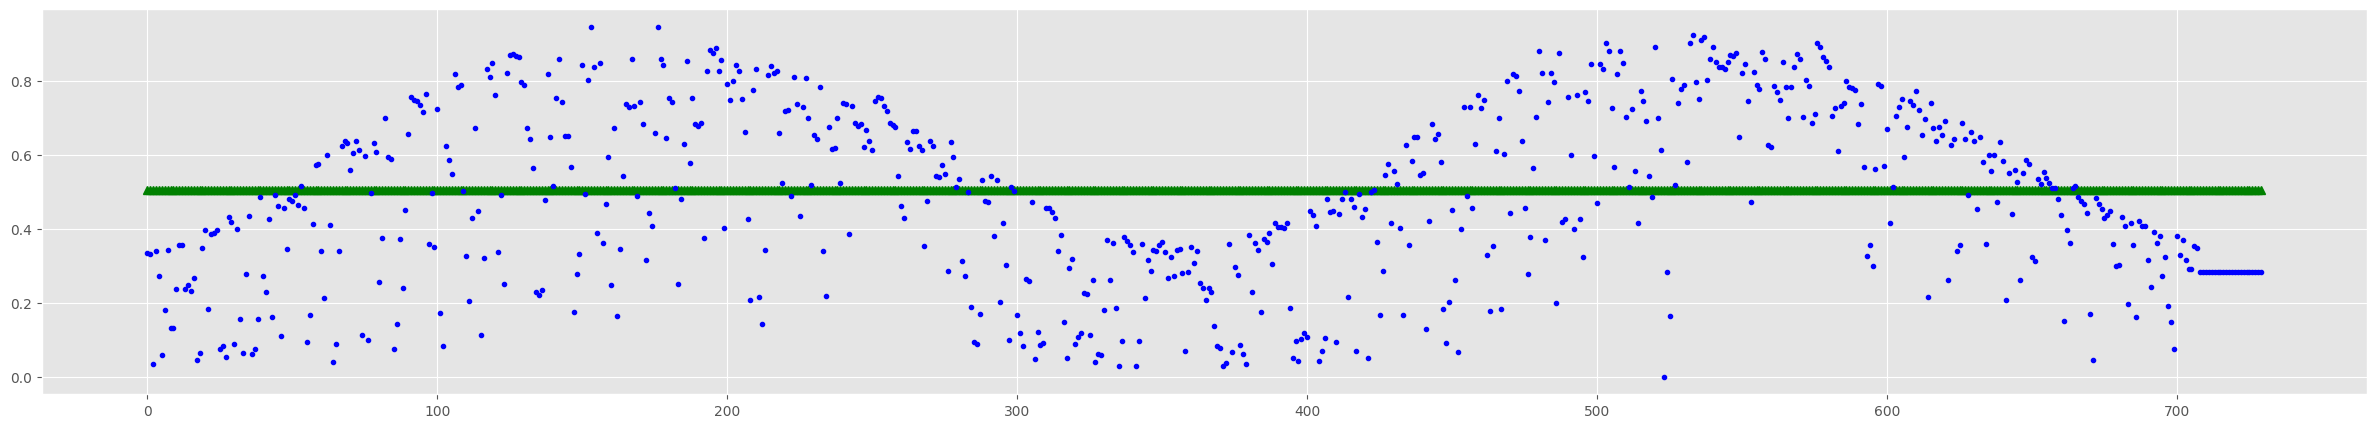

In [33]:
regrElastic = ElasticNet()

start_time = time.time()
regrElastic.fit(X_train, y_train)
end_time = time.time()

y_pred = regrElastic.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrElastic, 730)


Coeficiente de determinación del modelo: 0.8027341994800896
Error cuadrático medio (MSE): 0.011409996798856905
Raíz cuadrada del error cuadrático medio (RMSE): 0.10681758656165614
Mean Absolute Error (MAE): 0.07071343501040717
Tiempo de entrenamiento: 0.20429277420043945
Mejor alpha encontrado: 5.872786613189489e-06


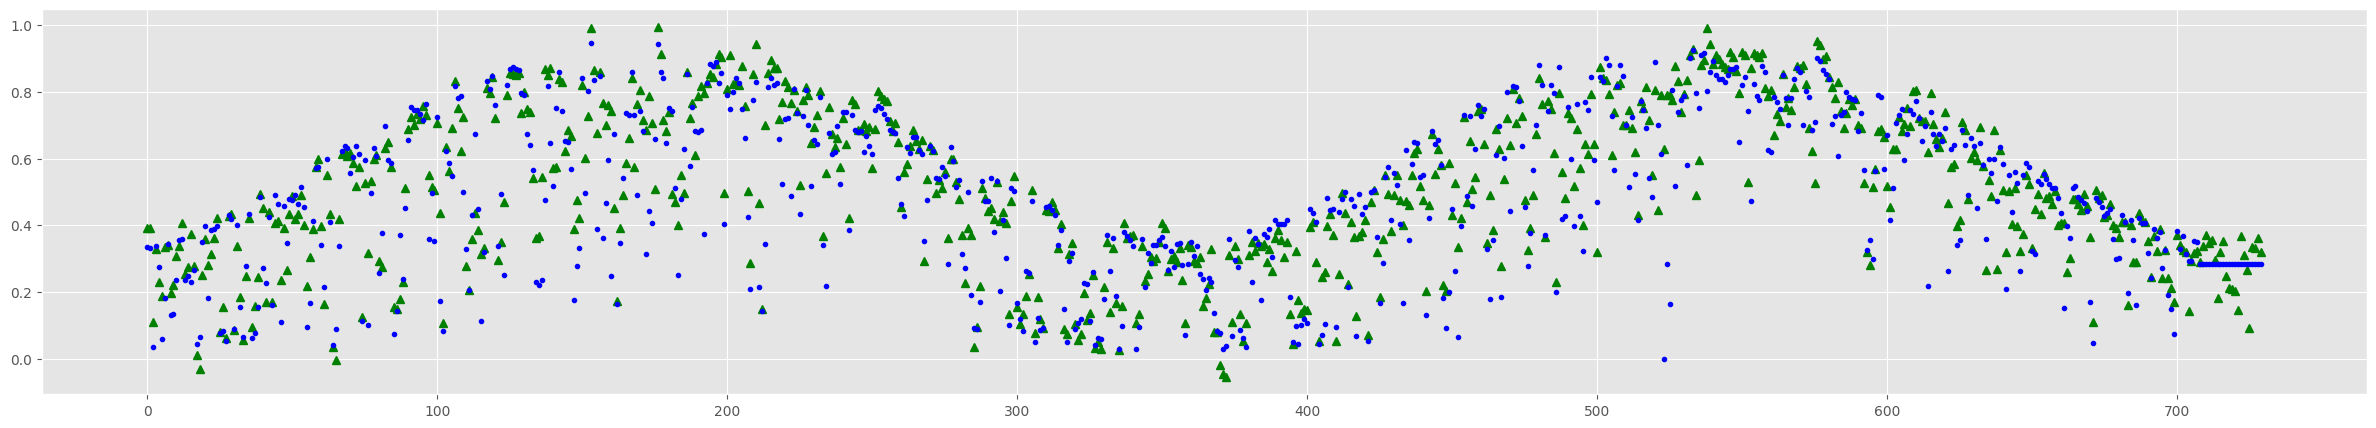

In [34]:
regrElastic = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )

start_time = time.time()
regrElastic.fit(X_train, y_train)
end_time = time.time()

y_pred = regrElastic.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
best_alpha = regrElastic.alpha_
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
print("Mejor alpha encontrado:", best_alpha)
pintaResultados(regrElastic, 730)

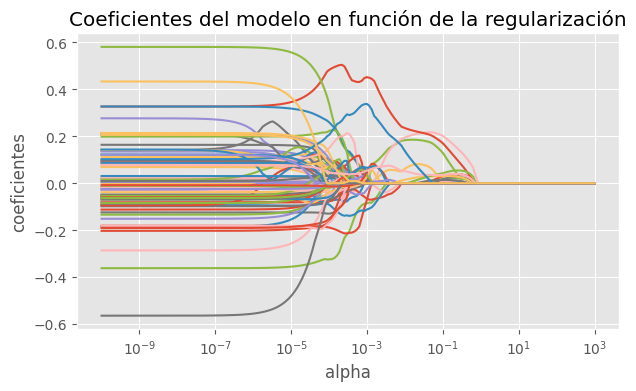

In [35]:
alphas = regrElastic.alphas
coefs = []

for alpha in alphas:
    modelo_temp = ElasticNet(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

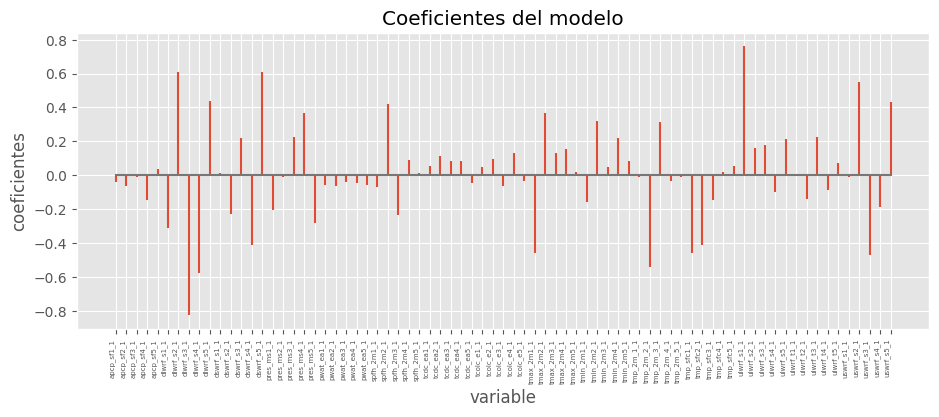

In [36]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': df_normalized.columns[:-1],
                         'coef': regrElastic.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

# Comparación de los modelos

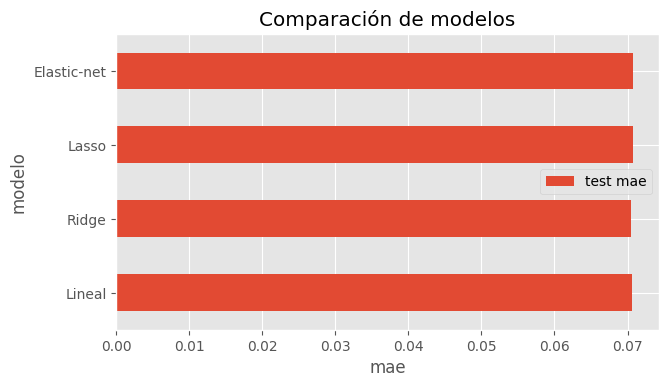

In [37]:
def mae(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return mean_absolute_error(y_test, y_test_pred)

mae_lineal = mae(y_test, pipe_regr.predict(X=X_test))
mae_ridge = mae(y_test, regrRidge.predict(X=X_test))
mae_lasso = mae(y_test, regrLasso.predict(X=X_test))
mae_elastic = mae(y_test, regrElastic.predict(X=X_test))
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test mae': [mae_lineal, mae_ridge, mae_lasso, mae_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('mae')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

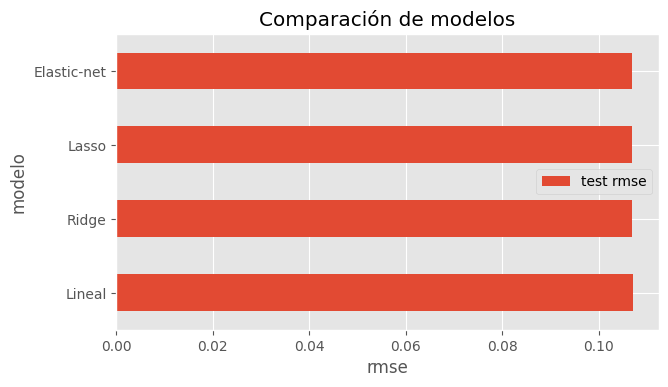

In [38]:
def rmse(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(mean_squared_error(y_test, y_test_pred))

rmse_lineal = rmse(y_test, pipe_regr.predict(X=X_test))
rmse_ridge = rmse(y_test, regrRidge.predict(X=X_test))
rmse_lasso = rmse(y_test, regrLasso.predict(X=X_test))
rmse_elastic = rmse(y_test, regrElastic.predict(X=X_test))
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_lineal, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [39]:
# Coeficientes de los distintos modelos
# ==============================================================================
d = [["Lineal", np.count_nonzero(np.abs(reg_lin.coef_.flatten()) > 0.5)],
     ["Ridge", np.count_nonzero(np.abs(regrRidge.coef_.flatten()) > 0.5)],
     ["Lasso", np.count_nonzero(np.abs(regrLasso.coef_.flatten()) > 0.5)],
     ["Elastic Net", np.count_nonzero(np.abs(regrElastic.coef_.flatten()) > 0.5)]]

df = pd.DataFrame(d, columns = ['Modelo','Núm. predictores'])
print(df)

        Modelo  Núm. predictores
0       Lineal                 1
1        Ridge                29
2        Lasso                 8
3  Elastic Net                 7


 Si el coeficiente de un predictor es mayor a 0.5, significa que tiene un efecto relativamente grande en la variable de respuesta y es un predictor importante en el modelo.

# 5) Dimensionalidad del problema

In [40]:
"""# Calcular la varianza de cada columna
varianzas = df_normalized.var()

# Ordenar las columnas por varianza de menor a mayor
columnas_ordenadas = varianzas.sort_values()

# Mostrar por pantalla todas las variables y su varianza
print(columnas_ordenadas)

umbral = 0.01 # Umbral de varianza mínima permitido

# Filtrar columnas con varianza menor al umbral
columnas_filtradas = varianzas[varianzas >= umbral].index

# Seleccionar solo las columnas con varianza mayor o igual al umbral
df_filtrado = df_normalized[columnas_filtradas]

varianzas2 = df_filtrado.var()

colum_ord = varianzas2.sort_values()

print(colum_ord)

X_train, X_test, y_train, y_test = train_test_split(df_filtrado.iloc[:, :-1], df_filtrado.iloc[:, -1],
                                                    train_size=3650, shuffle=False)"""

'# Calcular la varianza de cada columna\nvarianzas = df_normalized.var()\n\n# Ordenar las columnas por varianza de menor a mayor\ncolumnas_ordenadas = varianzas.sort_values()\n\n# Mostrar por pantalla todas las variables y su varianza\nprint(columnas_ordenadas)\n\numbral = 0.01 # Umbral de varianza mínima permitido\n\n# Filtrar columnas con varianza menor al umbral\ncolumnas_filtradas = varianzas[varianzas >= umbral].index\n\n# Seleccionar solo las columnas con varianza mayor o igual al umbral\ndf_filtrado = df_normalized[columnas_filtradas]\n\nvarianzas2 = df_filtrado.var()\n\ncolum_ord = varianzas2.sort_values()\n\nprint(colum_ord)\n\nX_train, X_test, y_train, y_test = train_test_split(df_filtrado.iloc[:, :-1], df_filtrado.iloc[:, -1],\n                                                    train_size=3650, shuffle=False)'

# 6) Métodos avanzados

## SVR

In [41]:
from sklearn.svm import LinearSVC, SVR
from sklearn.metrics import accuracy_score, r2_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [42]:
# Creamos el modelo SVM lineal y lo ajustamos a los datos de entrenamiento
svm = SVR()

np.random.seed(53)
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()

y_pred = svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time


print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Coeficiente de determinación del modelo: 0.8123557455934429
Error cuadrático medio (MSE): 0.010853479601937431
Raíz cuadrada del error cuadrático medio (RMSE): 0.10418003456486963
Mean Absolute Error (MAE): 0.07022824494993012
Tiempo de entrenamiento: 0.46698498725891113


# SVR evaluado con MAE

In [43]:
svr = SVR()

# Definir grilla de hiperparámetros a probar
param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}

# Realizar búsqueda de hiperparámetros
hpo_regr = GridSearchCV(svr, 
                        param_grid, 
                        scoring='neg_mean_absolute_error', 
                        cv=ps, 
                        n_jobs=-1, 
                        verbose=1)

np.random.seed(53)
start_time = time.time()
hpo_regr.fit(X_train, y_train)
end_time = time.time()

y_pred = hpo_regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', hpo_regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 30 candidates, totalling 30 fits
Mejores hiperparámetros: {'C': 10000, 'gamma': 0.001}
Coeficiente de determinación del modelo: 0.8105511471393245
Error cuadrático medio (MSE): 0.010957858883751337
Raíz cuadrada del error cuadrático medio (RMSE): 0.10467979214610304
Mean Absolute Error (MAE): 0.07027560453980917
Tiempo de entrenamiento: 67.05967378616333


# SVR evaluado con RMSE

In [44]:
svr = SVR()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}



# Definition of a 2-step process that self-adjusts 2 hyperpars
hpo_regr = GridSearchCV(svr, 
                        param_grid,
                        scoring='neg_root_mean_squared_error',
                        cv=ps, 
                        n_jobs=-1, 
                        verbose=1)

np.random.seed(53)
start_time = time.time()
hpo_regr.fit(X_train, y_train)
end_time = time.time()

y_pred = hpo_regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', hpo_regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 30 candidates, totalling 30 fits
Mejores hiperparámetros: {'C': 1, 'gamma': 0.1}
Coeficiente de determinación del modelo: 0.8116582788147513
Error cuadrático medio (MSE): 0.010893821585652845
Raíz cuadrada del error cuadrático medio (RMSE): 0.10437347165660844
Mean Absolute Error (MAE): 0.07024640859549815
Tiempo de entrenamiento: 53.47450232505798


## Random forests

In [54]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def rmse(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

In [46]:
regr_rf = RandomForestRegressor()
np.random.seed(53)
start_time = time.time()
regr_rf.fit(X_train, y_train)
end_time = time.time()

y_pred = regr_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)


Coeficiente de determinación del modelo: 0.7995611743999708
Error cuadrático medio (MSE): 0.011593526867989158
Raíz cuadrada del error cuadrático medio (RMSE): 0.10767324118827834
Mean Absolute Error (MAE): 0.06933283790008478
Tiempo de entrenamiento: 30.111252546310425


# Random forest evaluado con MAE

## Optimización de parámetros: n_estimators

Valor óptimo de n_estimators: 141


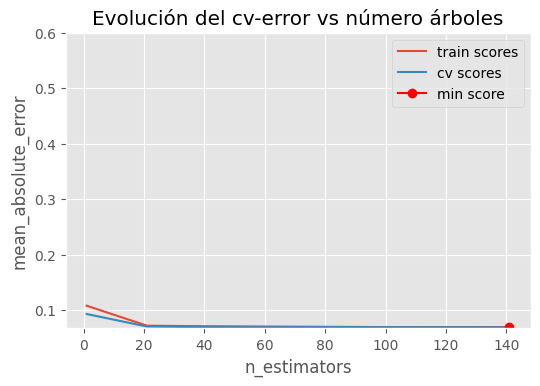

In [47]:
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 20)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth    = None,
                max_features = 1.0,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(mean_absolute_error(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_mean_absolute_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_absolute_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
ax.set_ylim([None,0.6])
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

## Optimización de parámetros: max_features

Valor óptimo de max_features: 10


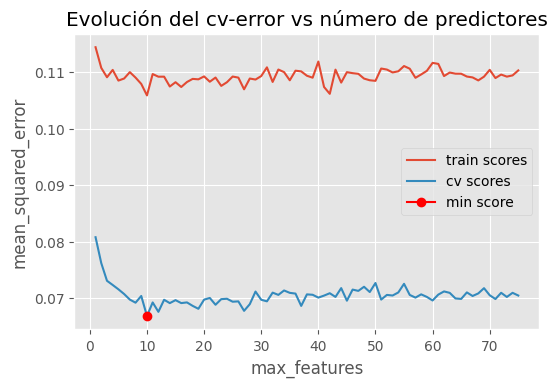

In [48]:
def rmse(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 20,
                max_depth    = None,
                max_features = max_features,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(rmse(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_mean_absolute_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

In [49]:
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,76)}


regr = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=ps,
                         n_jobs=-1, 
                         verbose=1
                        )

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)


Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'max_features': 10, 'n_estimators': 68}
Coeficiente de determinación del modelo: 0.8028882195242412
Error cuadrático medio (MSE): 0.011401088167933058
Raíz cuadrada del error cuadrático medio (RMSE): 0.10677587821194943
Mean Absolute Error (MAE): 0.06846593598643454
Tiempo de entrenamiento: 44.495505571365356


## Importancia por permutación

In [50]:
from sklearn.inspection import permutation_importance
import multiprocessing

importancia = permutation_importance(
                estimator    = regr,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_mean_absolute_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 53
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
# df_importancia['feature'] = X_train.columns
df_importancia['feature'] = df_normalized.columns[:-1]
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
13,0.031550,0.000328,dswrf_s4_1
14,0.028955,0.000295,dswrf_s5_1
12,0.025902,0.000179,dswrf_s3_1
72,0.017941,0.000140,uswrf_s3_1
74,0.017763,0.000177,uswrf_s5_1
...,...,...,...
50,0.001307,0.000027,tmp_2m_1_1
55,0.001302,0.000024,tmp_sfc1_1
41,0.001074,0.000024,tmax_2m2_1
70,0.000808,0.000046,uswrf_s1_1


Las características que tienen una importancia media más alta son las que tienen el mayor impacto en el rendimiento del modelo. Estas características son las que el modelo utiliza más para hacer predicciones.

La desviación estándar de las importancias indica cuánto varía la importancia de una característica en diferentes repeticiones de la importancia de permutación. Una desviación estándar alta significa que la importancia de una característica es menos confiable, ya que cambia significativamente de una repetición a otra.

Si una característica tiene una importancia media cercana a cero, significa que tiene poco o ningún impacto en el rendimiento del modelo. Esto puede deberse a que la característica es redundante o no es relevante para hacer predicciones precisas.

Por lo tanto, las variables que se muestran en la tabla con valor inferior a 0.001 (valor que hemos considerado nosotros), no tienen un impacto significativo en el modelo y por lo tanto podrían ser eliminadas.

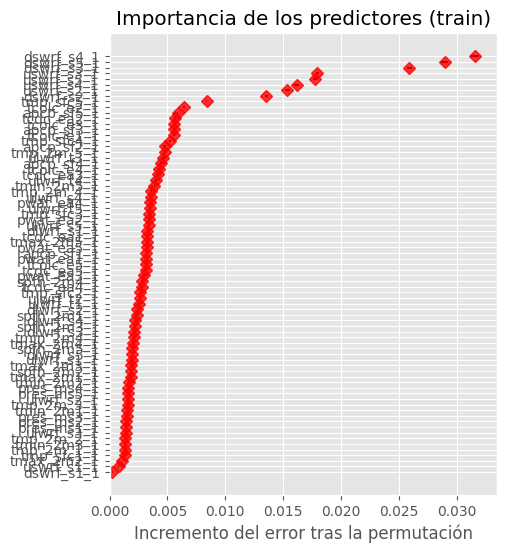

In [51]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

La gráfica representa la importancia de los predictores en el modelo de aprendizaje automático. El eje y del gráfico representa los nombres de los predictores y el eje x representa la importancia de cada predictor en el modelo. La importancia se mide como el incremento del error después de permutar aleatoriamente los valores del predictor. Los predictores más importantes se ubican en la parte superior del eje y, mientras que los predictores menos importantes se ubican en la parte inferior.

## Importancia por pureza

In [52]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df_normalized.columns[:-1],
                             'importancia': regr.best_estimator_.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
13,dswrf_s4_1,0.138251
14,dswrf_s5_1,0.100349
12,dswrf_s3_1,0.099200
72,uswrf_s3_1,0.073988
71,uswrf_s2_1,0.065429
...,...,...
47,tmin_2m3_1,0.001559
51,tmp_2m_2_1,0.001521
50,tmp_2m_1_1,0.001492
70,uswrf_s1_1,0.001102


La salida muestra qué predictores son más importantes en el modelo ajustado y puede ayudar a los analistas a comprender qué variables influyen más en la predicción del modelo.

Al igual que en el apartado anterior, aquellas variables con una importancia baja no afectarían significativamente al modelo por lo que se podrían eliminar.

# Random forest evaluado con RMSE

## Optimización de parámetros: n_estimators

Mean absolute error (MAE):  [0.15695840790200685, 0.11025751414578486, 0.10950754019737863, 0.10887793565524674, 0.10834645084244297, 0.10758826028576375, 0.10764079275269198, 0.10764685772356505]
Valor óptimo de n_estimators: 141


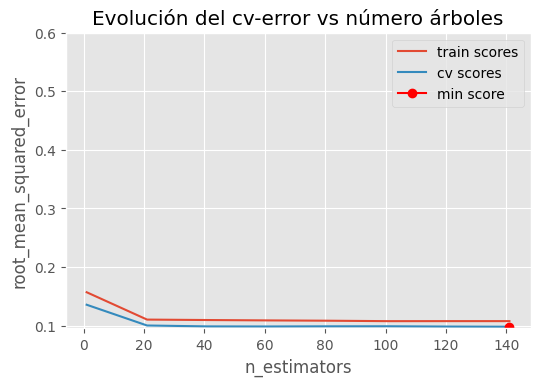

In [55]:
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 20)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth    = None,
                max_features = 1.0,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(rmse(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

print("Mean absolute error (MAE): ", train_scores)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
ax.set_ylim([None,0.6])
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

## Optimización de parámetros: max_features

Valor óptimo de max_features: 10


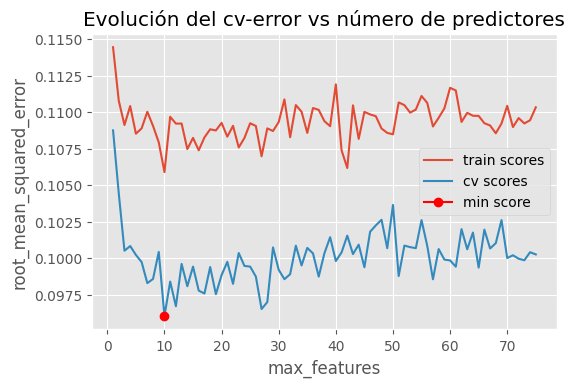

In [56]:
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 20,
                max_depth    = None,
                max_features = max_features,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 53
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(rmse(y_test, modelo.predict(X=X_test)))
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = ps
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

In [57]:
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,76)}


regr = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=ps,
                         n_jobs=-1, 
                         verbose=1
                        )

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'max_features': 10, 'n_estimators': 68}
Coeficiente de determinación del modelo: 0.8028882195242412
Error cuadrático medio (MSE): 0.011401088167933058
Raíz cuadrada del error cuadrático medio (RMSE): 0.10677587821194943
Mean Absolute Error (MAE): 0.06846593598643454
Tiempo de entrenamiento: 57.64407563209534


## Importancia por permutación

In [58]:
from sklearn.inspection import permutation_importance
import multiprocessing

importancia = permutation_importance(
                estimator    = regr,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 53
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
# df_importancia['feature'] = X_train.columns
df_importancia['feature'] = df_normalized.columns[:-1]
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
13,0.036105,0.000395,dswrf_s4_1
14,0.032796,0.000341,dswrf_s5_1
12,0.029785,0.000085,dswrf_s3_1
72,0.020592,0.000233,uswrf_s3_1
74,0.020017,0.000243,uswrf_s5_1
...,...,...,...
55,0.001380,0.000057,tmp_sfc1_1
51,0.001373,0.000057,tmp_2m_2_1
41,0.001332,0.000036,tmax_2m2_1
70,0.001127,0.000083,uswrf_s1_1


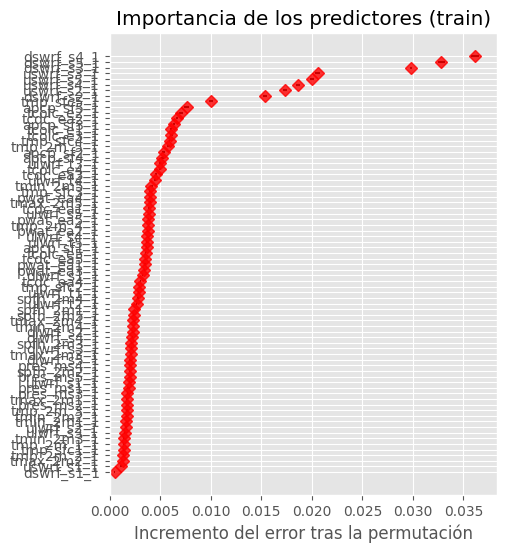

In [59]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

## Gradient boosting

In [60]:
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from scipy.stats import randint as sp_randint
import multiprocessing

# Para dibujar las predicciones y los valores reales
def pintaResultados (reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test[:n].size)
  pred = reg.predict(X=X_test)
  plt.plot(x, y_test[:n], 'b.', label='Verdaderas')
  plt.plot(x, pred[:n], 'g^', label='Predichas')
  plt.legend();

Coeficiente de determinación del modelo: 0.7937615273691206
Error cuadrático medio (MSE): 0.011928982653442556
Raíz cuadrada del error cuadrático medio (RMSE): 0.10921988213435573
Mean Absolute Error (MAE): 0.07150572656838797
Tiempo de entrenamiento: 1.9973483085632324


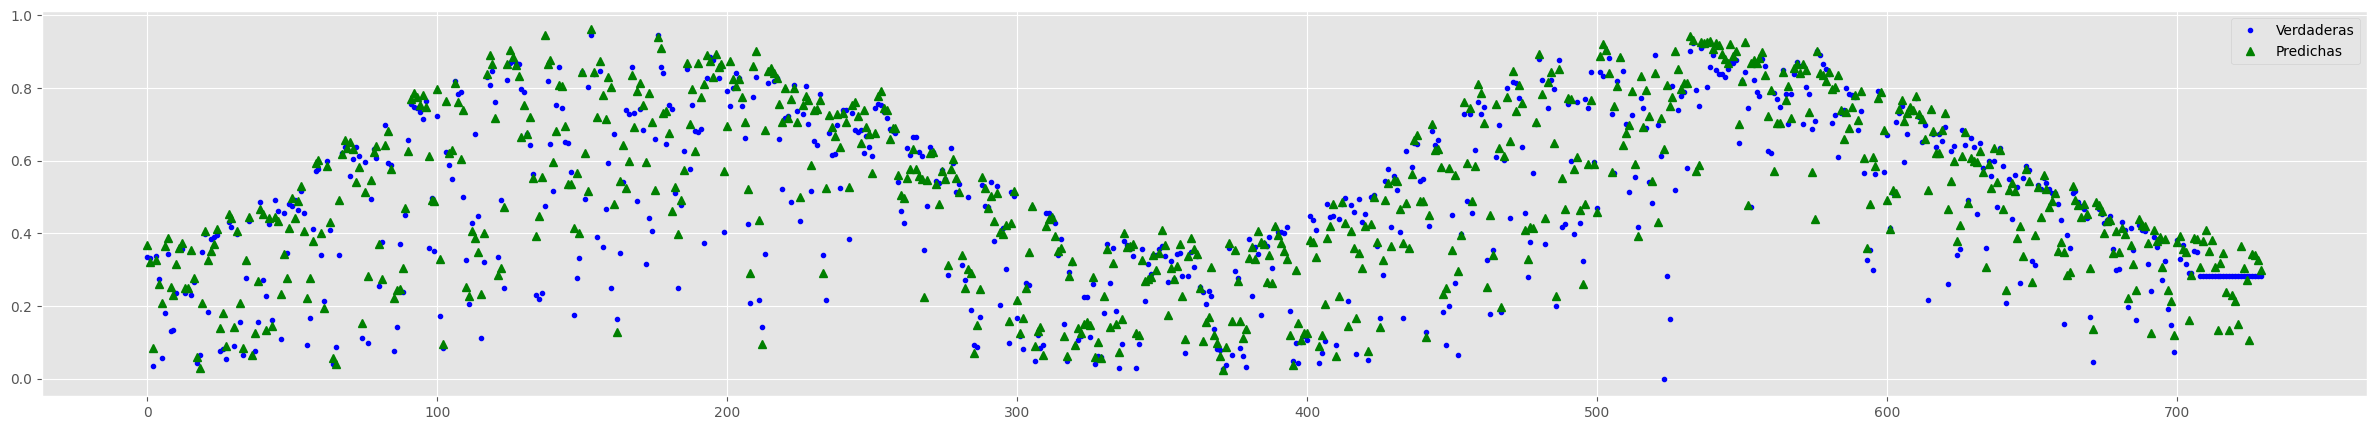

In [61]:
regr_gb = HistGradientBoostingRegressor()

np.random.seed(53)
start_time = time.time()
regr_gb.fit(X_train, y_train)
end_time = time.time()

y_pred = regr_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

pintaResultados(regr_gb, 730)

# Gradient boosting evaluado con MAE

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'max_leaf_nodes': 30, 'max_depth': 1, 'learning_rate': 0.2, 'l2_regularization': 1}
Coeficiente de determinación del modelo: 0.8013285748243586
Error cuadrático medio (MSE): 0.011491299147160636
Raíz cuadrada del error cuadrático medio (RMSE): 0.10719747733580598
Mean Absolute Error (MAE): 0.06978635916771504
Tiempo de entrenamiento: 20.4166100025177


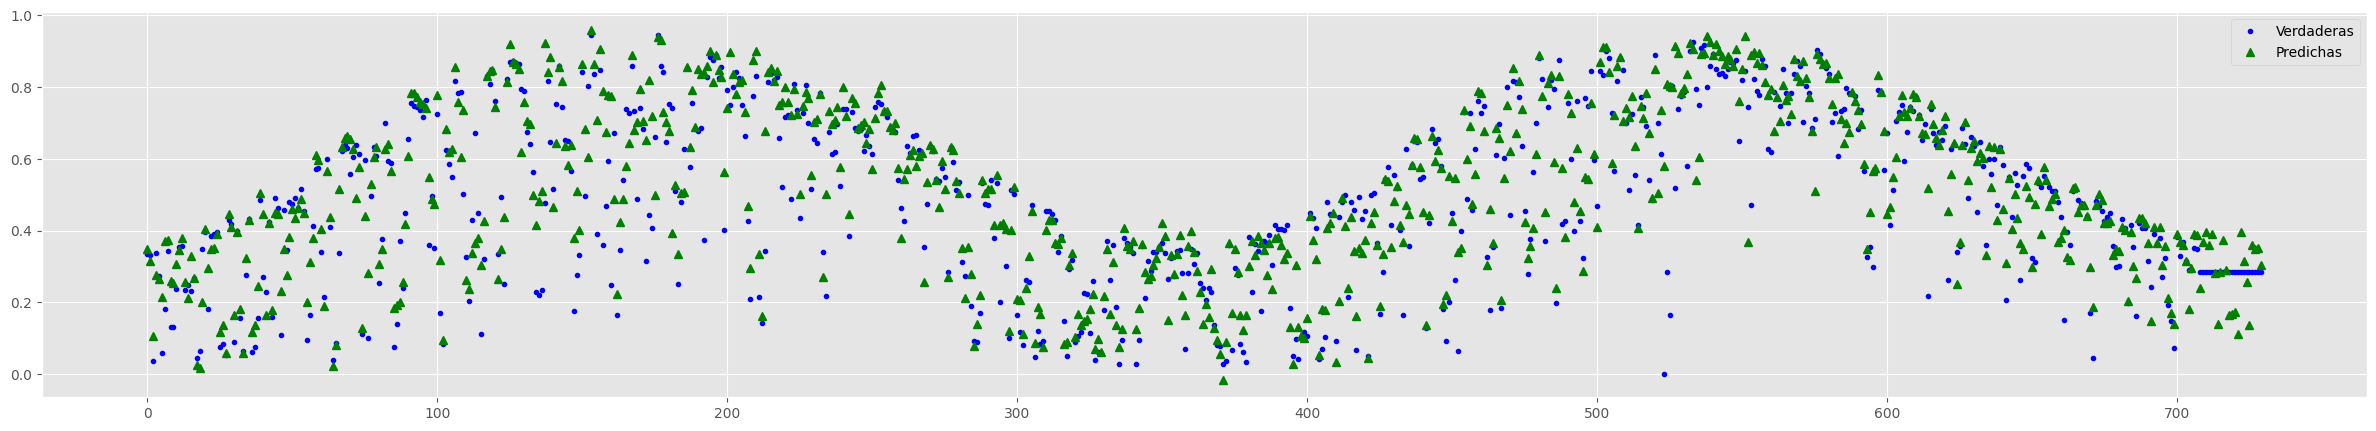

In [62]:
param_grid = {'max_depth'         : [None, 1, 3, 5, 10, 20],
              'learning_rate'     : [0.001, 0.01, 0.1, 0.2],
              'l2_regularization' : [0, 1],
              'max_leaf_nodes': [3, 10, 30]
             }


regr = RandomizedSearchCV (estimator  = HistGradientBoostingRegressor(max_iter            = 1000,
                                                                      random_state        = 53,
                                                                      # Activación de la parada temprana
                                                                      validation_fraction = 0.1,
                                                                      n_iter_no_change    = 5,
                                                                      tol                 = 0.0001),
                           param_distributions = param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=ps,
                           n_jobs=-1,
                           verbose=1)

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

pintaResultados(regr, 730)

## Importancia por permutación

In [63]:
from sklearn.inspection import permutation_importance
import multiprocessing

importancia = permutation_importance(
                estimator    = regr,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_mean_absolute_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 53
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )

df_importancia['feature'] = df_normalized.columns[:-1]
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
13,0.067554,0.000910,dswrf_s4_1
12,0.035699,0.000729,dswrf_s3_1
14,0.013413,0.000390,dswrf_s5_1
31,0.004915,0.000090,tcdc_ea2_1
21,0.004902,0.000109,pwat_ea2_1
...,...,...,...
70,0.000000,0.000000,uswrf_s1_1
9,0.000000,0.000000,dlwrf_s5_1
46,0.000000,0.000000,tmin_2m2_1
61,-0.000003,0.000004,ulwrf_s2_1


Al igual que en Random Forest, se muestran las variables con su importancia media. Loa valores cambian al ser un modelo diferente e igualmente se pueden eliminar aquellas variables que no afectan de forma significativa al modelo.

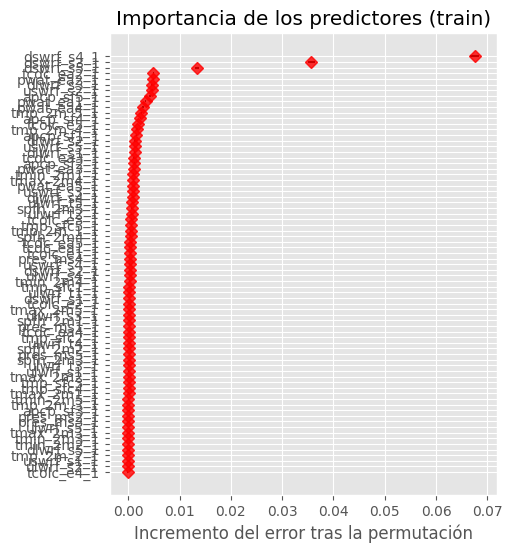

In [64]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

# Gradient boosting evaluado con RMSE

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'max_leaf_nodes': 30, 'max_depth': 1, 'learning_rate': 0.1, 'l2_regularization': 1}
Coeficiente de determinación del modelo: 0.8057985499148734
Error cuadrático medio (MSE): 0.011232752549933325
Raíz cuadrada del error cuadrático medio (RMSE): 0.10598468073232718
Mean Absolute Error (MAE): 0.06883148286984242
Tiempo de entrenamiento: 24.08390712738037


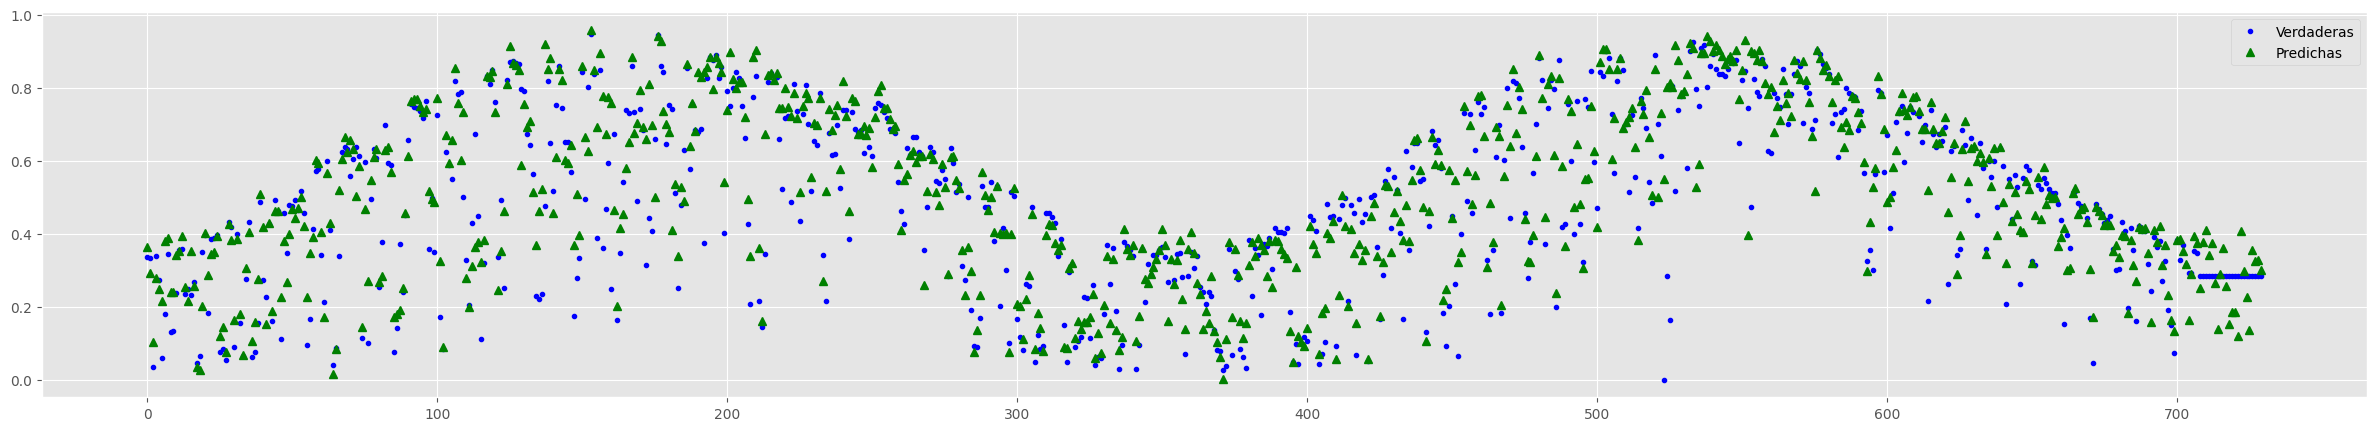

In [65]:
param_grid = {'max_depth'         : [None, 1, 3, 5, 10, 20],
              'learning_rate'     : [0.001, 0.01, 0.1, 0.2],
              'l2_regularization' : [0, 1],
              'max_leaf_nodes': [3, 10, 30]
             }


regr = RandomizedSearchCV (estimator  = HistGradientBoostingRegressor(max_iter            = 1000,
                                                                      random_state        = 53,
                                                                      # Activación de la parada temprana
                                                                      validation_fraction = 0.1,
                                                                      n_iter_no_change    = 5,
                                                                      tol                 = 0.0001),
                           param_distributions = param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=ps,
                           n_jobs=-1,
                           verbose=1)

np.random.seed(53)
start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', regr.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)

pintaResultados(regr, 730)

## Importancia por permutación

In [66]:
from sklearn.inspection import permutation_importance
import multiprocessing

importancia = permutation_importance(
                estimator    = regr,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 53
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )

df_importancia['feature'] = df_normalized.columns[:-1]
df_importancia.sort_values('importances_mean', ascending=False)

KeyboardInterrupt: 

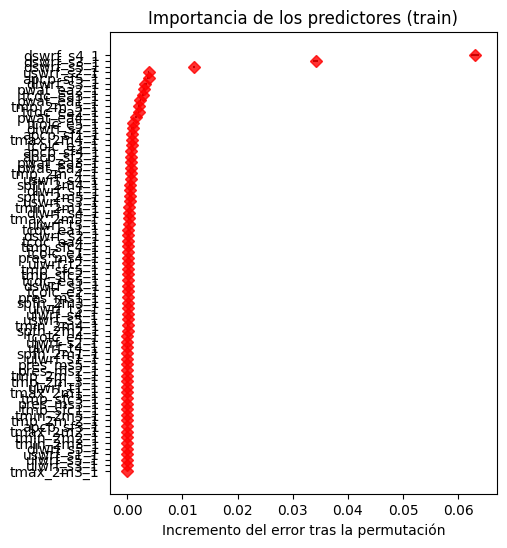

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

# XGBoost evaluado con MAE

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 292, 'subsample': 1}
Coeficiente de determinación del modelo: 0.8013134395452661
Error cuadrático medio (MSE): 0.011492174582667148
Raíz cuadrada del error cuadrático medio (RMSE): 0.10720156054212619
Mean Absolute Error (MAE): 0.06903906095927553
Tiempo de entrenamiento: 24.29530167579651


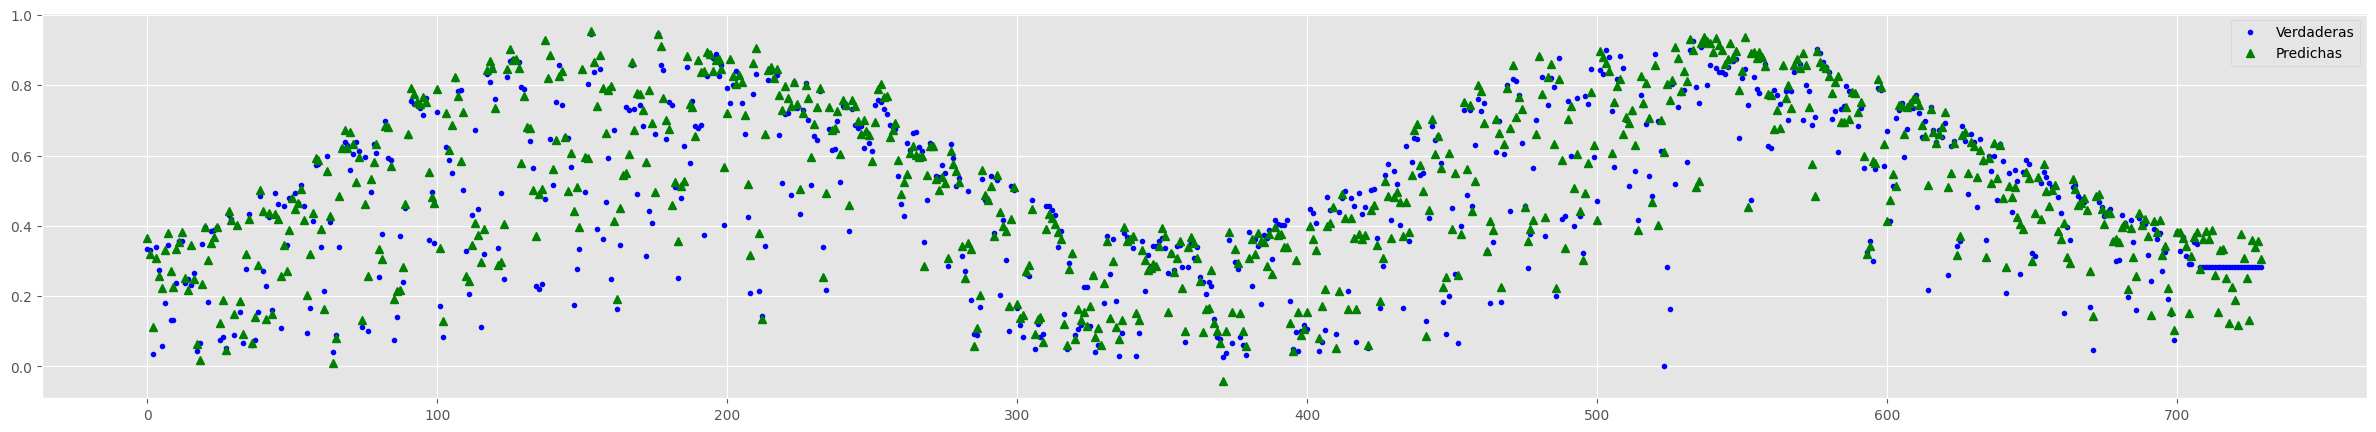

In [ ]:
# espacio de búsqueda
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'n_estimators'     : sp_randint(50, 500)
              }

# Búsqueda por random search con validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
    estimator  = XGBRegressor(random_state = 53),
    param_distributions= param_grid,
    scoring    = 'neg_mean_absolute_error',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = ps,
    verbose    = 1,
)

np.random.seed(53)
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid, 730)

#  XGBoost evaluado con RMSE

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 292, 'subsample': 1}
Coeficiente de determinación del modelo: 0.8013134395452661
Error cuadrático medio (MSE): 0.011492174582667148
Raíz cuadrada del error cuadrático medio (RMSE): 0.10720156054212619
Mean Absolute Error (MAE): 0.06903906095927553
Tiempo de entrenamiento: 33.539977073669434


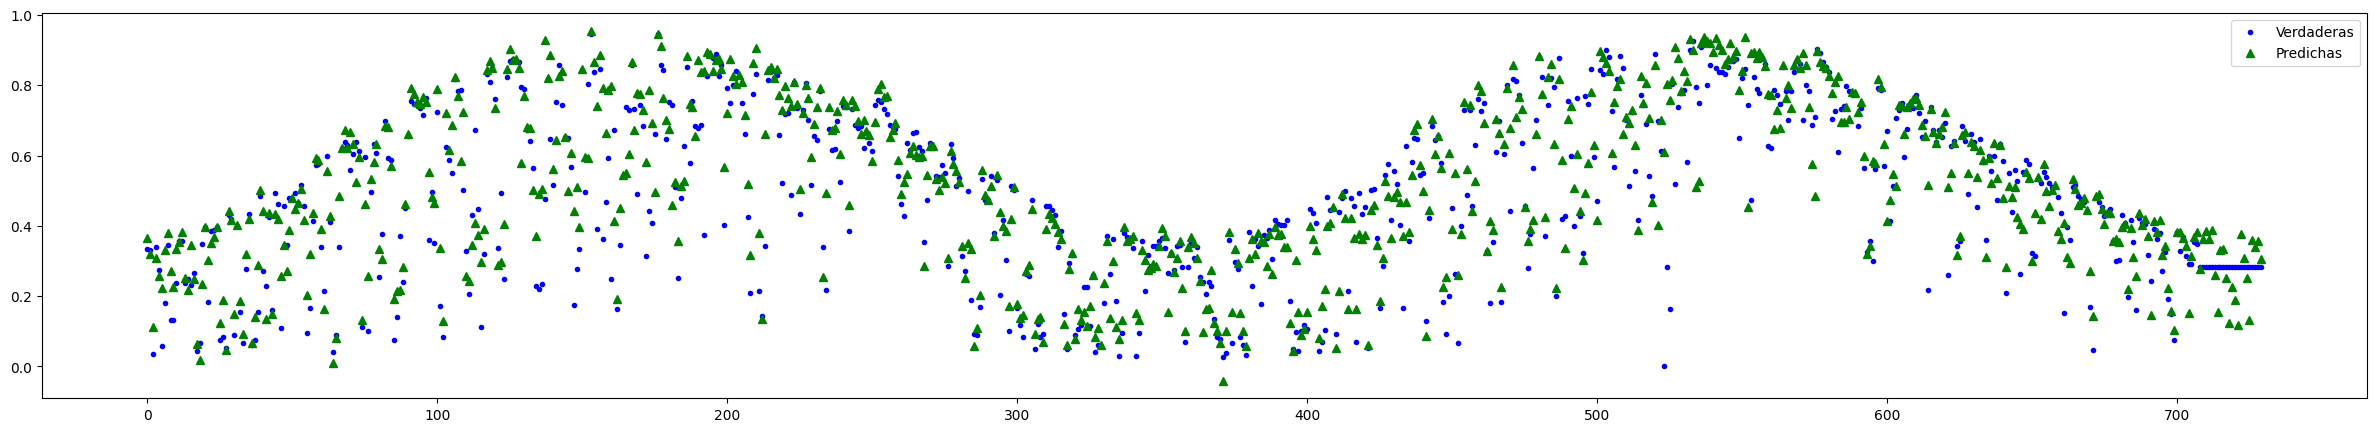

In [ ]:
# espacio de búsqueda
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'n_estimators'     : sp_randint(50, 500)
              }

# Búsqueda por random search con validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
    estimator  = XGBRegressor(random_state = 53),
    param_distributions= param_grid,
    scoring    = 'neg_root_mean_squared_error',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = ps,
    verbose    = 1,
)

np.random.seed(53)
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid, 730)

# LightGBM evaluado con MAE

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1428, 'subsample': 0.5}
Coeficiente de determinación del modelo: 0.7981166969788686
Error cuadrático medio (MSE): 0.011677076488386404
Raíz cuadrada del error cuadrático medio (RMSE): 0.10806052233996652
Mean Absolute Error (MAE): 0.07037770046506135
Tiempo de entrenamiento: 51.12664866447449


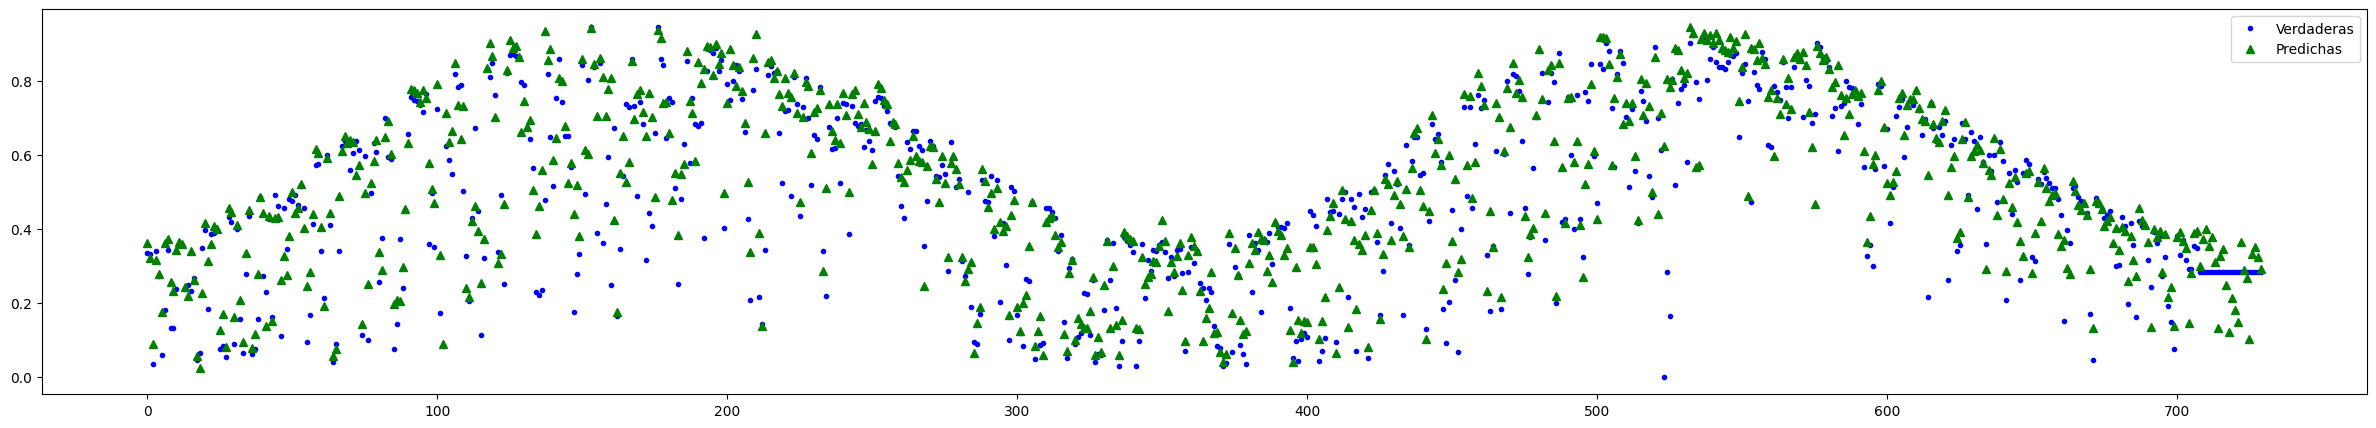

In [ ]:
param_grid = {'n_estimators'     : sp_randint(100, 5000),
              'max_depth'        : [-1, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'boosting_type'    : ['gbdt']
             }



grid = RandomizedSearchCV(
        estimator  = LGBMRegressor(random_state=42),
        param_distributions = param_grid,
        scoring    = 'neg_mean_absolute_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = ps, 
        verbose    = 1,
        return_train_score = True,
       )

np.random.seed(53)
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid, 730)

# LightGBM evaluado con RMSE

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Mejores hiperparámetros: {'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 4318, 'subsample': 1}
Coeficiente de determinación del modelo: 0.7957032772479016
Error cuadrático medio (MSE): 0.011816670433875456
Raíz cuadrada del error cuadrático medio (RMSE): 0.1087045097218853
Mean Absolute Error (MAE): 0.07011575900878897
Tiempo de entrenamiento: 40.177998304367065


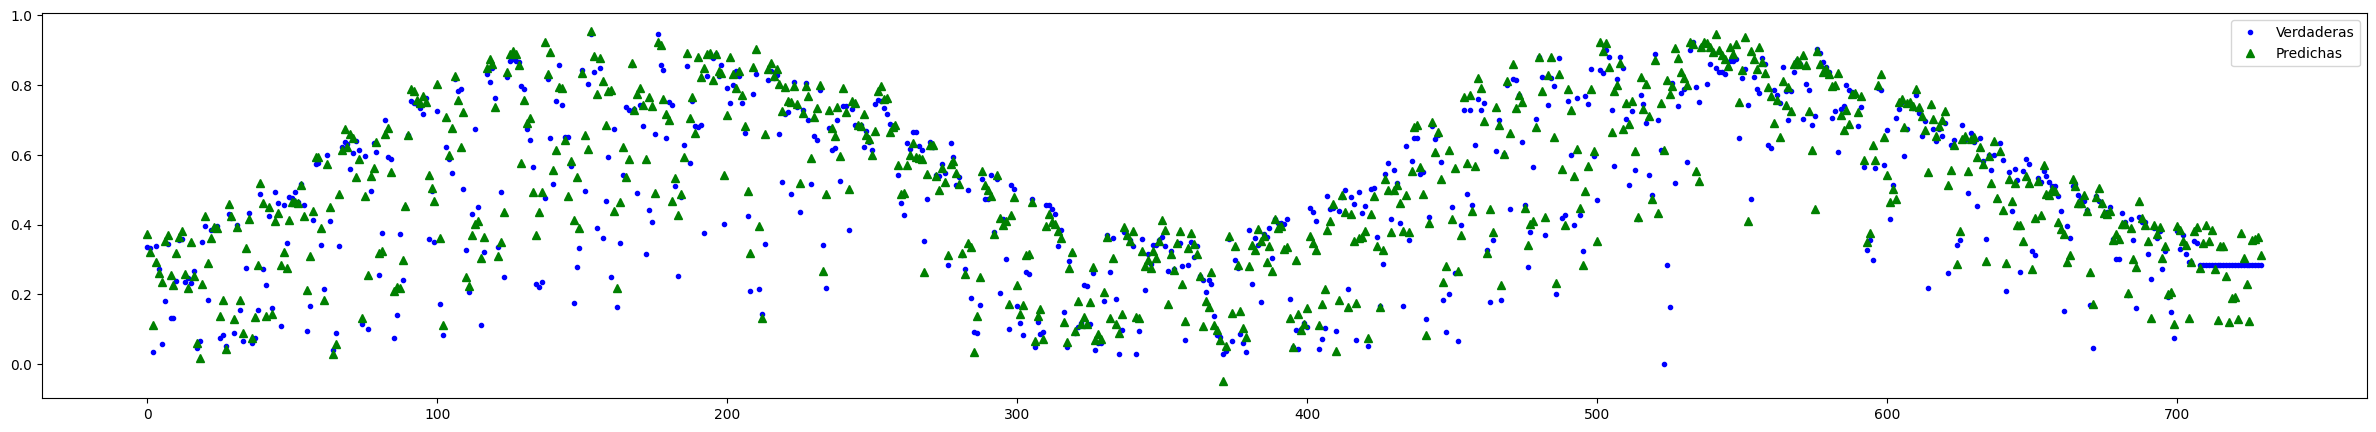

In [ ]:
param_grid = {'n_estimators'     : sp_randint(100, 5000),
              'max_depth'        : [-1, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'boosting_type'    : ['gbdt']
             }



grid = RandomizedSearchCV(
        estimator  = LGBMRegressor(random_state=42),
        param_distributions = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = ps, 
        verbose    = 1,
        return_train_score = True,
       )

np.random.seed(53)
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()

y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tiempo_entrenamiento = end_time - start_time

print('Mejores hiperparámetros:', grid.best_params_)
print("Coeficiente de determinación del modelo:", r2)
print("Error cuadrático medio (MSE):", mse)
print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Tiempo de entrenamiento:", tiempo_entrenamiento)
pintaResultados(grid, 730)

# 8) Modelo final

In [148]:
X = df_normalized.drop(columns = 'salida').to_numpy()
y = df_normalized['salida'].to_numpy()

comp_df = pd.read_csv("comp_st8ns1.txt.bz2",
 compression="bz2",
index_col=0)

scaler = MinMaxScaler()
df_comp_normalized = scaler.fit_transform(comp_df)
df_normalized2 = pd.DataFrame(df_comp_normalized, columns=comp_df.columns).to_numpy()

In [149]:
# Creamos el modelo SVM lineal y lo ajustamos a los datos de entrenamiento
modelo_final = SVR(C=1, gamma=0.1)

np.random.seed(53)
start_time = time.time()
modelo_final.fit(X, y)
end_time = time.time()

In [150]:
import pickle
pickle.dump(modelo_final, open('modelo_final.pkl', 'wb'))

# Hacer predicciones en el conjunto de datos de la competición y guardarlas en un archivo
# ==============================================================================
comp_pred = modelo_final.predict(df_normalized2)
pred_df = pd.DataFrame(comp_pred, columns=['Predicción'])
pred_df.to_csv('predicciones.csv', index=False)